In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import tensorflow as tf
if not os.path.exists("helper_functions.py"):
  !wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
else:
  print("[INFO] 'helper_functions.py' already exists, skipping download.")
from helper_functions import *
# from tensorflow.keras import mixed_precision
# mixed_precision.set_global_policy('mixed_float16')
importTensorflow(memory=4000, precision=False)

[INFO] 'helper_functions.py' already exists, skipping download.
Tensorflow version : 2.15.0
1 Physical GPU(s), 1 Logical GPU(s)
Mixed precsion policy : <Policy "float32">


In [2]:
# download the dataset
if not os.path.exists("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv"):
    !wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
else:
    print("Dataset Already Exists")

Dataset Already Exists


In [3]:
# Import with pandas 
import pandas as pd
df = pd.read_csv("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", 
                 parse_dates=["Date"], 
                 index_col=["Date"])
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [4]:
df.info(), len(df)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


(None, 2787)

In [5]:
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


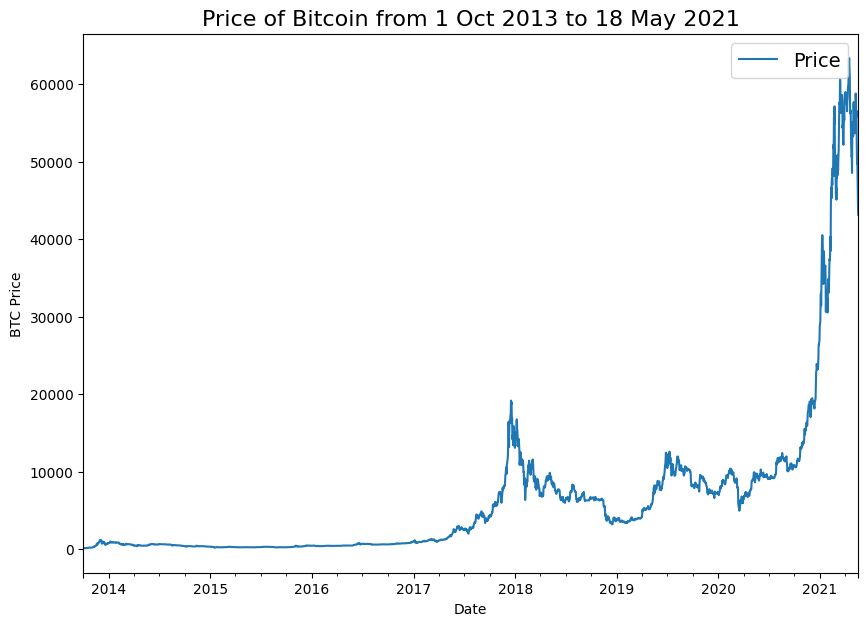

In [6]:
import matplotlib.pyplot as plt
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices.Price.to_numpy()
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.legend(fontsize=14);

In [7]:
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
    csv_reader = csv.reader(f, delimiter=",") # read in the target CSV
    next(csv_reader) # skip first line (this gets rid of the column titles)
    for line in csv_reader:
        timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) # get the dates as dates (not strings), strptime = string parse time
        btc_price.append(float(line[2])) # get the closing price as float

# View first 10 of each
timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

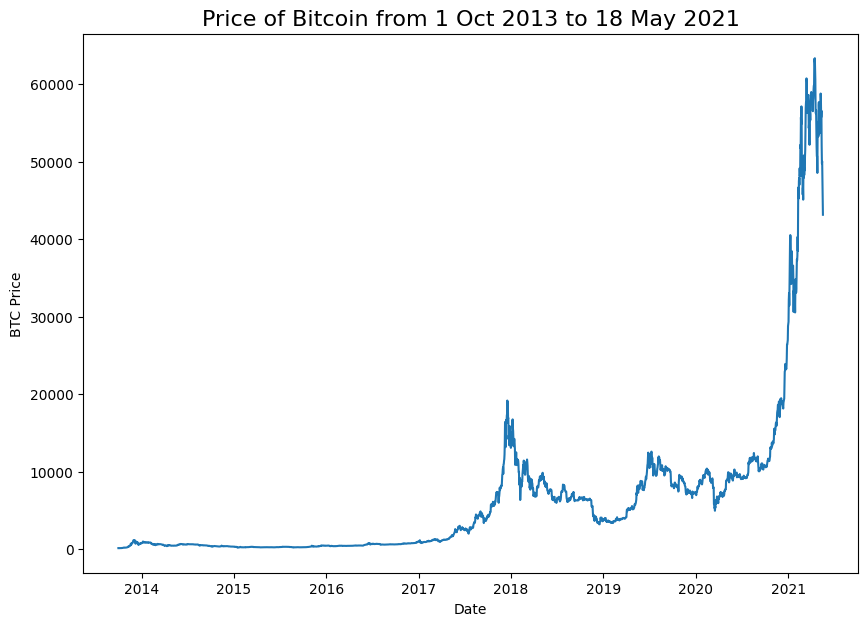

In [8]:
# Plot from CSV
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 7))
plt.plot(timesteps, btc_price)
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.xlabel("Date")
plt.ylabel("BTC Price");

In [9]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

(2229,) (558,) (2229,) (558,)


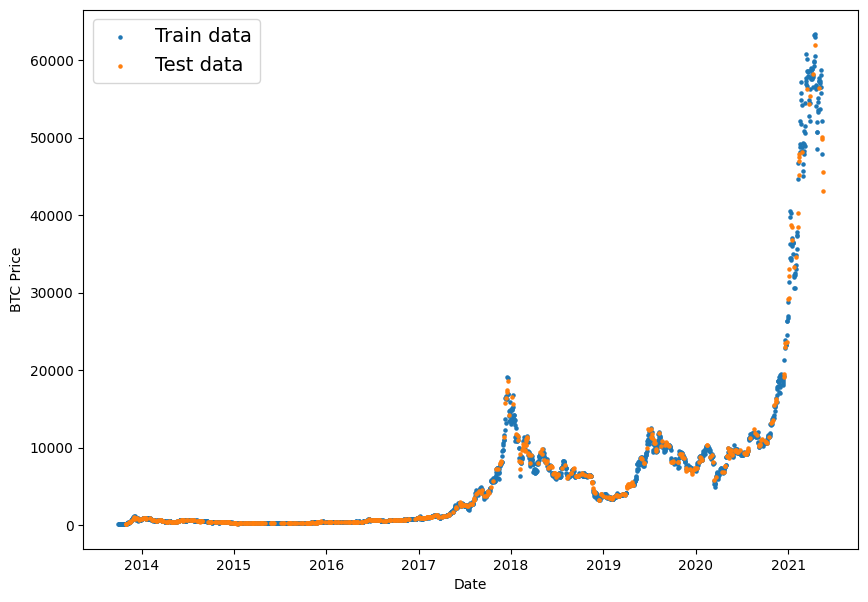

In [10]:
# creating train/test split - the wrong way
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(timesteps, # dates
                                                    prices, # prices
                                                    test_size=0.2,
                                                    random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

(2229, 558, 2229, 558)

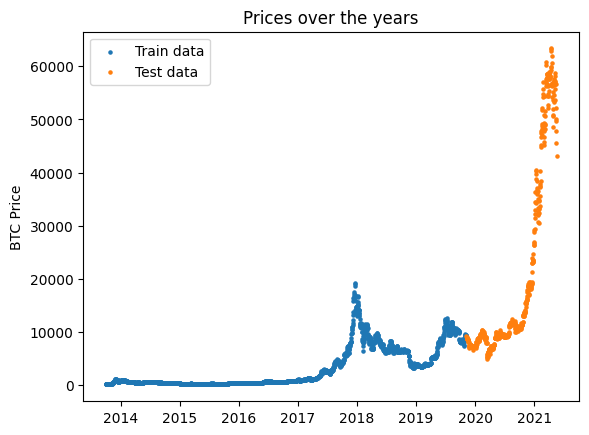

In [11]:
# Creating train/test split - the right way
split_size = int(0.8 * len(prices)) # 80% train, 20% test
X_train, y_train = timesteps[:split_size], prices[:split_size]
X_test, y_test = timesteps[split_size:], prices[split_size:]

plt.scatter(X_train, y_train, s=5, label='Train data')
plt.scatter(X_test, y_test, s=5, label='Test data')
plt.ylabel("BTC Price")
plt.title("Prices over the years")
plt.legend()

len(X_train), len(X_test), len(y_train), len(y_test)

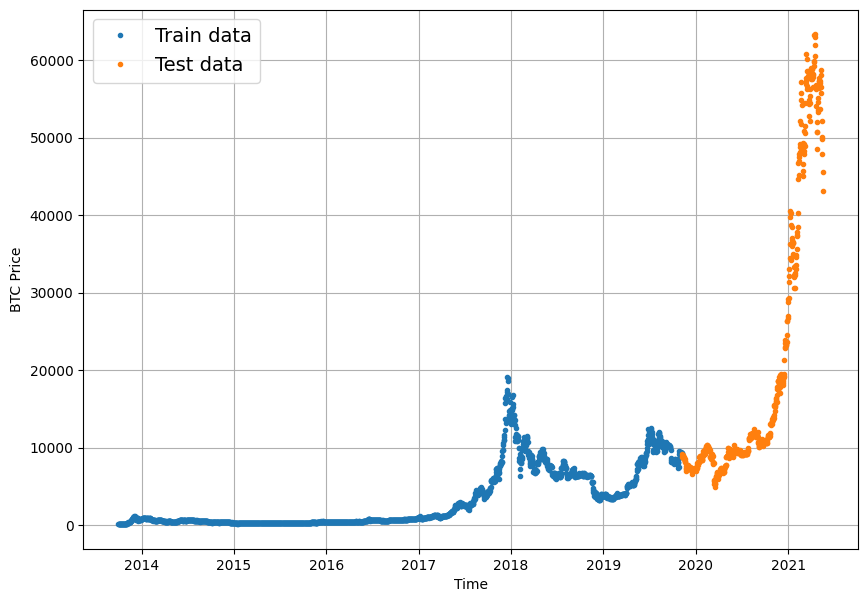

In [12]:
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
    plt.plot(timesteps[start:end], values[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("BTC Price")
    if label:
        plt.legend(fontsize=14) # make label bigger
        plt.grid(True)

plt.figure(figsize=(10,7))
plot_time_series(X_train, y_train, label='Train data')
plot_time_series(X_test, y_test, label='Test data')

# Modelling experiments

* **horizon** - the number of timesteps to be predicted
* **window** - number of observations used to predict the horizon

0. Naive model - baseline
1. Dense model (horizon = 1, window = 7)
2. Same as model 1 (horizon = 1, window = 30)
3. Same as model 1 (horizon = 7, window = 30)
4. Conv1D
5. LSTM
6. Same as model 1 (multivariate model)
7. N-BEATS algorithm
8. Ensemble
9. Future prediction model
10. Same as model 1 (turkey data introduced)

In [13]:
# Model 0 -Naive mode;
naive_forecast = y_test[:-1]
naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

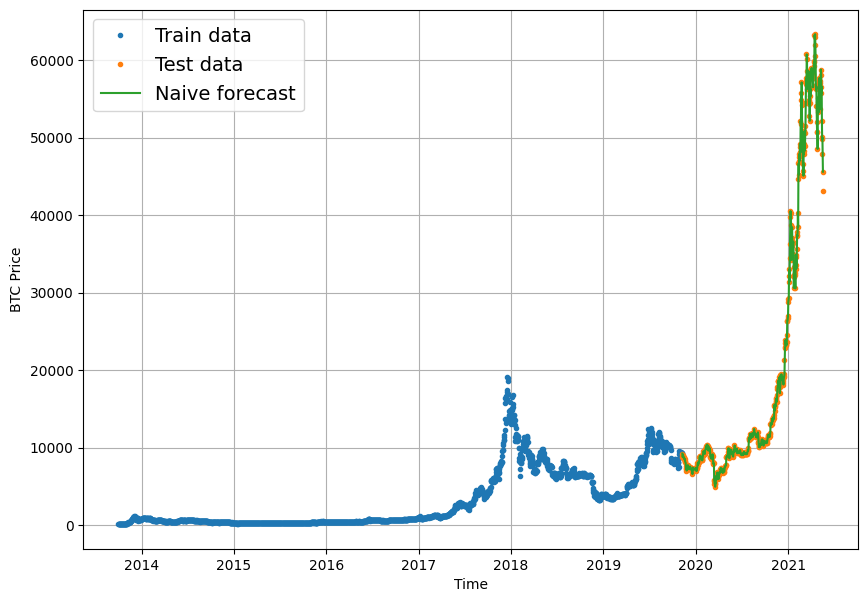

In [14]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast")

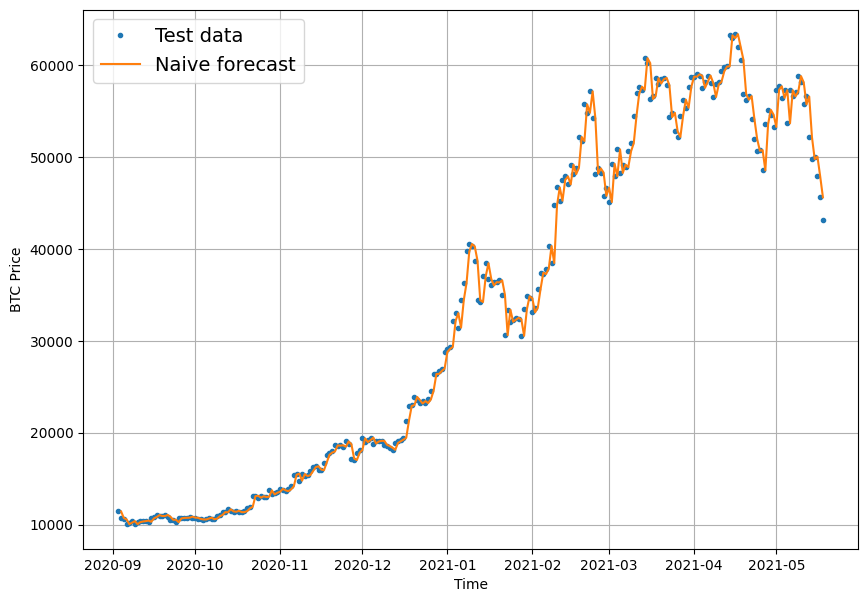

In [15]:
plt.figure(figsize=(10, 7))
offset=300
plot_time_series(timesteps=X_test, values=y_test, start=offset, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", start=offset, label="Naive forecast")

#### Evaluating time series forecasting

In [16]:
# implement MASE error - mean absolute scaled error
def mean_absolute_scaled_error(y_true, y_pred):
    '''
    No seasonality is assumed
    '''
    mae = tf.reduce_mean(tf.abs(y_true - y_pred))
    mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))
    return mae / mae_naive_no_season

mean_absolute_scaled_error(y_test[1:], naive_forecast).numpy()

0.9995699939182624

In [17]:
# Create loss function to return all loss metrics in dictionary format
def evaluate_preds(y_true, y_pred):
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)
    
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)
    
    return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

model_0_results = evaluate_preds(y_test[1:], naive_forecast)
model_0_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

### Format data - windowing our dataset

In [18]:
HORIZON = 1
WINDOW_SIZE = 7

def get_labelled_windows(x, horizon=HORIZON):
    return x[:,:-horizon], x[:, -horizon:]

test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0))
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


In [19]:
# Create function to view NumPy arrays as windows 
def make_windows(x, window_size=7, horizon=1):
    """
    Turns a 1D array into a 2D array of sequential windows of window_size.
    """
    window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
    window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
    windowed_array = x[window_indexes]
    windows, labels = get_labelled_windows(windowed_array, horizon=horizon)
    return windows, labels

full_windows, full_labels = make_windows(prices)
len(full_windows), len(full_labels)

(2780, 2780)

In [20]:
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


#### Use tensorflow to make it easier
**tf.keras.prrprocessing.timeseries.dataset_from_array(X)**

In [21]:
# train = tf.keras.preprocessing.timeseries_dataset_from_array(prices, targets=None, sequence_length=7)
# label = tf.keras.preprocessing.timeseries_dataset_from_array(prices, targets=None, sequence_length=1, start_index=7)
# next(iter(train))[:5], next(iter(label))[:5] 

In [22]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
    """
    Splits matching pairs of windows and labels into train and test splits.
    """
    split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
    train_windows = windows[:split_size]
    train_labels = labels[:split_size]
    test_windows = windows[split_size:]
    test_labels = labels[split_size:]
    return train_windows, test_windows, train_labels, test_labels

# full_windows, full_labels = make_windows(prices)
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(full_windows)

(2224, 556, 2780)

In [23]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [24]:
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

In [25]:
# make modelling checkpoint - because we train for longer epochs and the model experiments changes epoch to epoch
# therefore better to compare best performance(model_1) to best performance(model_2) - correct verificaation

# Create a function to implement a ModelCheckpoint callback with a specific filename 
def create_model_checkpoint(model_name, save_path="10_model_experiments"):
    return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            verbose=0,
                                            save_best_only=True)

In [26]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(128, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
], name="model_1_dense") 

model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

history1 = model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
 1/18 [>.............................] - ETA: 9s - loss: 1823.8076 - mae: 1823.8076

I0000 00:00:1703962445.298339    9287 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


18/18 [==============================] - 1s 24ms/step - loss: 620.3870 - mae: 620.3870 - val_loss: 1020.6585 - val_mae: 1020.6585
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 178.6054 - mae: 178.6054INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


18/18 [==============================] - 0s 14ms/step - loss: 218.8240 - mae: 218.8240 - val_loss: 1005.6227 - val_mae: 1005.6227
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 129.7109 - mae: 129.7109INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


18/18 [==============================] - 0s 15ms/step - loss: 172.9254 - mae: 172.9254 - val_loss: 992.0762 - val_mae: 992.0762
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 194.9550 - mae: 194.9550INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


18/18 [==============================] - 0s 13ms/step - loss: 157.4551 - mae: 157.4551 - val_loss: 881.8138 - val_mae: 881.8138
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 145.3233 - mae: 145.3233INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


18/18 [==============================] - 0s 14ms/step - loss: 151.4508 - mae: 151.4508 - val_loss: 832.6954 - val_mae: 832.6953
Epoch 6/100
18/18 [==============================] - 0s 2ms/step - loss: 153.4697 - mae: 153.4697 - val_loss: 912.4474 - val_mae: 912.4474
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 186.9719 - mae: 186.9719INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


18/18 [==============================] - 0s 14ms/step - loss: 152.5300 - mae: 152.5300 - val_loss: 795.8817 - val_mae: 795.8817
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 117.6733 - mae: 117.6733INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


18/18 [==============================] - 0s 15ms/step - loss: 144.3305 - mae: 144.3305 - val_loss: 787.8925 - val_mae: 787.8925
Epoch 9/100
 1/18 [>.............................] - ETA: 0s - loss: 124.4760 - mae: 124.4760INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


18/18 [==============================] - 0s 14ms/step - loss: 143.4348 - mae: 143.4348 - val_loss: 775.6000 - val_mae: 775.6000
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 143.0415 - mae: 143.0415INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


18/18 [==============================] - 0s 14ms/step - loss: 137.1868 - mae: 137.1868 - val_loss: 741.3367 - val_mae: 741.3367
Epoch 11/100
18/18 [==============================] - 0s 2ms/step - loss: 132.5929 - mae: 132.5929 - val_loss: 748.8822 - val_mae: 748.8822
Epoch 12/100
18/18 [==============================] - 0s 2ms/step - loss: 132.5017 - mae: 132.5017 - val_loss: 812.2410 - val_mae: 812.2410
Epoch 13/100
18/18 [==============================] - 0s 2ms/step - loss: 136.0230 - mae: 136.0230 - val_loss: 750.5493 - val_mae: 750.5493
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 133.3578 - mae: 133.3578INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


18/18 [==============================] - 0s 14ms/step - loss: 128.1605 - mae: 128.1605 - val_loss: 714.0555 - val_mae: 714.0555
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 124.8215 - mae: 124.8215INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


18/18 [==============================] - 0s 13ms/step - loss: 129.8785 - mae: 129.8785 - val_loss: 691.2399 - val_mae: 691.2399
Epoch 16/100
 1/18 [>.............................] - ETA: 0s - loss: 111.7104 - mae: 111.7104INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


18/18 [==============================] - 0s 20ms/step - loss: 123.6101 - mae: 123.6101 - val_loss: 687.3159 - val_mae: 687.3159
Epoch 17/100
18/18 [==============================] - 0s 2ms/step - loss: 123.0524 - mae: 123.0524 - val_loss: 700.4755 - val_mae: 700.4755
Epoch 18/100
 1/18 [>.............................] - ETA: 0s - loss: 138.6151 - mae: 138.6151INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


18/18 [==============================] - 0s 13ms/step - loss: 121.2304 - mae: 121.2304 - val_loss: 657.0945 - val_mae: 657.0945
Epoch 19/100
18/18 [==============================] - 0s 2ms/step - loss: 122.4741 - mae: 122.4741 - val_loss: 739.6151 - val_mae: 739.6151
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 136.1982 - mae: 136.1982INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


18/18 [==============================] - 0s 13ms/step - loss: 120.0919 - mae: 120.0919 - val_loss: 641.6699 - val_mae: 641.6699
Epoch 21/100
18/18 [==============================] - 0s 2ms/step - loss: 121.0444 - mae: 121.0444 - val_loss: 645.0894 - val_mae: 645.0894
Epoch 22/100
18/18 [==============================] - 0s 2ms/step - loss: 123.4403 - mae: 123.4403 - val_loss: 681.8873 - val_mae: 681.8873
Epoch 23/100
 1/18 [>.............................] - ETA: 0s - loss: 122.3203 - mae: 122.3203INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


18/18 [==============================] - 0s 13ms/step - loss: 124.5074 - mae: 124.5074 - val_loss: 635.8221 - val_mae: 635.8221
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 125.3000 - mae: 125.3000INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


18/18 [==============================] - 0s 13ms/step - loss: 118.0665 - mae: 118.0665 - val_loss: 627.0277 - val_mae: 627.0277
Epoch 25/100
18/18 [==============================] - 0s 2ms/step - loss: 115.8848 - mae: 115.8848 - val_loss: 637.6134 - val_mae: 637.6134
Epoch 26/100
 1/18 [>.............................] - ETA: 0s - loss: 116.4355 - mae: 116.4355INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


18/18 [==============================] - 0s 13ms/step - loss: 117.4133 - mae: 117.4133 - val_loss: 624.0421 - val_mae: 624.0421
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 158.6740 - mae: 158.6740INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


18/18 [==============================] - 0s 13ms/step - loss: 117.5356 - mae: 117.5356 - val_loss: 613.3420 - val_mae: 613.3420
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 109.1553 - mae: 109.1553INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


18/18 [==============================] - 0s 13ms/step - loss: 114.0909 - mae: 114.0909 - val_loss: 609.1638 - val_mae: 609.1638
Epoch 29/100
18/18 [==============================] - 0s 2ms/step - loss: 113.6251 - mae: 113.6251 - val_loss: 620.9008 - val_mae: 620.9008
Epoch 30/100
 1/18 [>.............................] - ETA: 0s - loss: 127.1397 - mae: 127.1397INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


18/18 [==============================] - 0s 13ms/step - loss: 119.8001 - mae: 119.8001 - val_loss: 605.0458 - val_mae: 605.0458
Epoch 31/100
18/18 [==============================] - 0s 2ms/step - loss: 114.7171 - mae: 114.7171 - val_loss: 618.6945 - val_mae: 618.6945
Epoch 32/100
18/18 [==============================] - 0s 2ms/step - loss: 114.8732 - mae: 114.8732 - val_loss: 624.5057 - val_mae: 624.5057
Epoch 33/100
18/18 [==============================] - 0s 2ms/step - loss: 113.6897 - mae: 113.6897 - val_loss: 608.1433 - val_mae: 608.1433
Epoch 34/100
 1/18 [>.............................] - ETA: 0s - loss: 128.5476 - mae: 128.5476INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


18/18 [==============================] - 0s 13ms/step - loss: 112.8630 - mae: 112.8630 - val_loss: 596.3298 - val_mae: 596.3298
Epoch 35/100
 1/18 [>.............................] - ETA: 0s - loss: 99.1530 - mae: 99.1530INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


18/18 [==============================] - 0s 13ms/step - loss: 112.0443 - mae: 112.0443 - val_loss: 595.9036 - val_mae: 595.9036
Epoch 36/100
 1/18 [>.............................] - ETA: 0s - loss: 152.7212 - mae: 152.7212INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


18/18 [==============================] - 0s 13ms/step - loss: 116.6139 - mae: 116.6139 - val_loss: 595.0657 - val_mae: 595.0657
Epoch 37/100
18/18 [==============================] - 0s 2ms/step - loss: 111.4783 - mae: 111.4783 - val_loss: 597.8508 - val_mae: 597.8508
Epoch 38/100
18/18 [==============================] - 0s 2ms/step - loss: 113.7668 - mae: 113.7668 - val_loss: 628.2080 - val_mae: 628.2080
Epoch 39/100
 1/18 [>.............................] - ETA: 0s - loss: 126.5555 - mae: 126.5555INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


18/18 [==============================] - 0s 13ms/step - loss: 112.2140 - mae: 112.2140 - val_loss: 592.5951 - val_mae: 592.5951
Epoch 40/100
18/18 [==============================] - 0s 2ms/step - loss: 111.6535 - mae: 111.6535 - val_loss: 610.1479 - val_mae: 610.1479
Epoch 41/100
18/18 [==============================] - 0s 2ms/step - loss: 111.0895 - mae: 111.0895 - val_loss: 594.0414 - val_mae: 594.0414
Epoch 42/100
18/18 [==============================] - 0s 2ms/step - loss: 114.9079 - mae: 114.9079 - val_loss: 682.0796 - val_mae: 682.0796
Epoch 43/100
18/18 [==============================] - 0s 2ms/step - loss: 120.8133 - mae: 120.8133 - val_loss: 707.4498 - val_mae: 707.4498
Epoch 44/100
18/18 [==============================] - 0s 2ms/step - loss: 124.9092 - mae: 124.9092 - val_loss: 661.8267 - val_mae: 661.8267
Epoch 45/100
18/18 [==============================] - 0s 2ms/step - loss: 115.7956 - mae: 115.7956 - val_loss: 615.4163 - val_mae: 615.4163
Epoch 46/100
 1/18 [>...........

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


18/18 [==============================] - 0s 13ms/step - loss: 111.5167 - mae: 111.5167 - val_loss: 582.6658 - val_mae: 582.6658
Epoch 47/100
18/18 [==============================] - 0s 2ms/step - loss: 109.7465 - mae: 109.7465 - val_loss: 628.0065 - val_mae: 628.0065
Epoch 48/100
18/18 [==============================] - 0s 2ms/step - loss: 110.2393 - mae: 110.2393 - val_loss: 609.0345 - val_mae: 609.0345
Epoch 49/100
 1/18 [>.............................] - ETA: 0s - loss: 162.2667 - mae: 162.2667INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


18/18 [==============================] - 0s 13ms/step - loss: 114.2701 - mae: 114.2701 - val_loss: 581.5835 - val_mae: 581.5835
Epoch 50/100
18/18 [==============================] - 0s 2ms/step - loss: 111.7182 - mae: 111.7182 - val_loss: 640.8127 - val_mae: 640.8127
Epoch 51/100
18/18 [==============================] - 0s 2ms/step - loss: 111.8354 - mae: 111.8354 - val_loss: 614.7515 - val_mae: 614.7515
Epoch 52/100
 1/18 [>.............................] - ETA: 0s - loss: 118.6494 - mae: 118.6494INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


18/18 [==============================] - 0s 13ms/step - loss: 112.3307 - mae: 112.3307 - val_loss: 575.4343 - val_mae: 575.4343
Epoch 53/100
18/18 [==============================] - 0s 2ms/step - loss: 110.2661 - mae: 110.2661 - val_loss: 656.4965 - val_mae: 656.4965
Epoch 54/100
18/18 [==============================] - 0s 2ms/step - loss: 111.4561 - mae: 111.4561 - val_loss: 597.7535 - val_mae: 597.7535
Epoch 55/100
18/18 [==============================] - 0s 2ms/step - loss: 115.0982 - mae: 115.0982 - val_loss: 603.1600 - val_mae: 603.1600
Epoch 56/100
18/18 [==============================] - 0s 2ms/step - loss: 113.2114 - mae: 113.2114 - val_loss: 821.3478 - val_mae: 821.3478
Epoch 57/100
18/18 [==============================] - 0s 2ms/step - loss: 131.0148 - mae: 131.0148 - val_loss: 713.2411 - val_mae: 713.2411
Epoch 58/100
18/18 [==============================] - 0s 2ms/step - loss: 119.1495 - mae: 119.1495 - val_loss: 627.2664 - val_mae: 627.2664
Epoch 59/100
18/18 [============

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


18/18 [==============================] - 0s 12ms/step - loss: 108.1050 - mae: 108.1050 - val_loss: 573.2350 - val_mae: 573.2350
Epoch 69/100
18/18 [==============================] - 0s 2ms/step - loss: 112.4933 - mae: 112.4933 - val_loss: 658.9579 - val_mae: 658.9579
Epoch 70/100
18/18 [==============================] - 0s 2ms/step - loss: 119.9556 - mae: 119.9556 - val_loss: 584.8061 - val_mae: 584.8061
Epoch 71/100
18/18 [==============================] - 0s 2ms/step - loss: 109.9528 - mae: 109.9528 - val_loss: 583.1624 - val_mae: 583.1624
Epoch 72/100
18/18 [==============================] - 0s 2ms/step - loss: 113.4748 - mae: 113.4748 - val_loss: 585.2578 - val_mae: 585.2578
Epoch 73/100
18/18 [==============================] - 0s 2ms/step - loss: 110.4489 - mae: 110.4489 - val_loss: 594.4290 - val_mae: 594.4290
Epoch 74/100
18/18 [==============================] - 0s 2ms/step - loss: 109.3978 - mae: 109.3978 - val_loss: 586.1192 - val_mae: 586.1192
Epoch 75/100
18/18 [============

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


18/18 [==============================] - 0s 13ms/step - loss: 106.5827 - mae: 106.5827 - val_loss: 570.9945 - val_mae: 570.9945
Epoch 78/100
18/18 [==============================] - 0s 2ms/step - loss: 109.3919 - mae: 109.3919 - val_loss: 620.1422 - val_mae: 620.1422
Epoch 79/100
18/18 [==============================] - 0s 2ms/step - loss: 110.8984 - mae: 110.8984 - val_loss: 580.0999 - val_mae: 580.0999
Epoch 80/100
18/18 [==============================] - 0s 2ms/step - loss: 106.5359 - mae: 106.5359 - val_loss: 574.9243 - val_mae: 574.9243
Epoch 81/100
18/18 [==============================] - 0s 2ms/step - loss: 106.1273 - mae: 106.1273 - val_loss: 576.3889 - val_mae: 576.3889
Epoch 82/100
 1/18 [>.............................] - ETA: 0s - loss: 188.9271 - mae: 188.9271INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 1400278095947

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


18/18 [==============================] - 0s 13ms/step - loss: 117.4448 - mae: 117.4448 - val_loss: 567.3969 - val_mae: 567.3969
Epoch 83/100
18/18 [==============================] - 0s 2ms/step - loss: 115.1527 - mae: 115.1527 - val_loss: 730.2468 - val_mae: 730.2468
Epoch 84/100
18/18 [==============================] - 0s 2ms/step - loss: 115.6600 - mae: 115.6600 - val_loss: 574.9706 - val_mae: 574.9706
Epoch 85/100
18/18 [==============================] - 0s 2ms/step - loss: 108.1694 - mae: 108.1694 - val_loss: 570.9174 - val_mae: 570.9174
Epoch 86/100
18/18 [==============================] - 0s 2ms/step - loss: 107.5743 - mae: 107.5743 - val_loss: 576.1507 - val_mae: 576.1507
Epoch 87/100
18/18 [==============================] - 0s 2ms/step - loss: 106.1396 - mae: 106.1396 - val_loss: 573.9382 - val_mae: 573.9382
Epoch 88/100
18/18 [==============================] - 0s 2ms/step - loss: 108.6934 - mae: 108.6934 - val_loss: 570.8888 - val_mae: 570.8888
Epoch 89/100
 1/18 [>...........

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


18/18 [==============================] - 0s 13ms/step - loss: 106.8075 - mae: 106.8075 - val_loss: 565.9467 - val_mae: 565.9467
Epoch 90/100
18/18 [==============================] - 0s 2ms/step - loss: 105.4438 - mae: 105.4438 - val_loss: 568.1287 - val_mae: 568.1287
Epoch 91/100
18/18 [==============================] - 0s 2ms/step - loss: 111.1371 - mae: 111.1371 - val_loss: 597.1937 - val_mae: 597.1937
Epoch 92/100
 1/18 [>.............................] - ETA: 0s - loss: 87.6438 - mae: 87.6438INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0ac0>, 140027809594704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41b0a30>, 140027811958576), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17eb8640>, 140027808949552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b17ed3460>, 140027808961840), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


18/18 [==============================] - 0s 21ms/step - loss: 112.2443 - mae: 112.2443 - val_loss: 565.9136 - val_mae: 565.9136
Epoch 93/100
18/18 [==============================] - 0s 2ms/step - loss: 115.9611 - mae: 115.9611 - val_loss: 586.7401 - val_mae: 586.7401
Epoch 94/100
18/18 [==============================] - 0s 2ms/step - loss: 115.1355 - mae: 115.1355 - val_loss: 587.7063 - val_mae: 587.7063
Epoch 95/100
18/18 [==============================] - 0s 2ms/step - loss: 105.8636 - mae: 105.8636 - val_loss: 566.7645 - val_mae: 566.7645
Epoch 96/100
18/18 [==============================] - 0s 2ms/step - loss: 105.9170 - mae: 105.9170 - val_loss: 573.7919 - val_mae: 573.7919
Epoch 97/100
18/18 [==============================] - 0s 2ms/step - loss: 106.3195 - mae: 106.3195 - val_loss: 567.4231 - val_mae: 567.4231
Epoch 98/100
18/18 [==============================] - 0s 2ms/step - loss: 106.1089 - mae: 106.1089 - val_loss: 574.1934 - val_mae: 574.1934
Epoch 99/100
18/18 [============

In [27]:
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 568.4979 - mae: 568.4979


[568.4978637695312, 568.4978637695312]

In [28]:
# load in the saved best performaing model
model_1 = tf.keras.models.load_model('10_model_experiments/model_1_dense/')
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 971us/step - loss: 565.9136 - mae: 565.9136


[565.91357421875, 565.91357421875]

In [29]:
# make forecast with the model (on the test dataset)
def make_preds(model, data):
    return tf.squeeze(model.predict(data))

# use it on model_1
model_1_preds = make_preds(model_1, test_windows)
model_1_preds[:10]

18/18 [==============================] - 0s 620us/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8869.395, 8785.912, 9031.486, 8798.232, 8777.92 , 8747.499,
       8695.567, 8539.703, 8476.828, 8537.197], dtype=float32)>

In [30]:
model_1_results = evaluate_preds(tf.squeeze(test_labels),
                                   model_1_preds)
model_1_results, model_0_results

({'mae': 565.9135,
  'mse': 1158106.9,
  'rmse': 1076.1538,
  'mape': 2.5522108,
  'mase': 0.9941533},
 {'mae': 567.9802,
  'mse': 1147547.0,
  'rmse': 1071.2362,
  'mape': 2.516525,
  'mase': 0.99957})

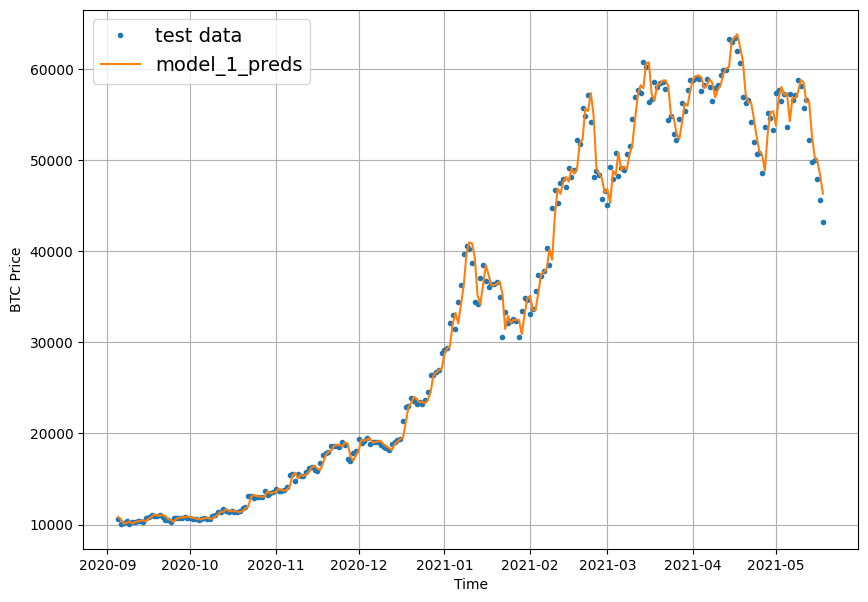

In [31]:
plt.figure(figsize=(10,7))
plot_time_series(X_test[-len(test_windows):], 
                 test_labels[:, 0], 
                 start=300, 
                 label='test data')
plot_time_series(X_test[-len(test_windows):], 
                 model_1_preds, 
                 start=300, 
                 format='-',
                 label='model_1_preds')


In [32]:
# Model 2 - model_1 with window_size=30 and horizon=1
full_windows_30_1, full_labels_30_1 = make_windows(prices, window_size=30, horizon=1)
train_windows_30_1, test_windows_30_1, train_labels_30_1, test_labels_30_1 = make_train_test_splits(full_windows_30_1, full_labels_30_1)

model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(HORIZON)
], name='model_2_dense_30_1')
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())
history_2 = model_2.fit(train_windows_30_1, train_labels_30_1,
                        epochs=100,
                        batch_size=128,
                        validation_data=(test_windows_30_1, test_labels_30_1),
                        callbacks=create_model_checkpoint(model_2.name))

Epoch 1/100
 1/18 [>.............................] - ETA: 6s - loss: 5763.1895INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


18/18 [==============================] - 1s 17ms/step - loss: 2421.3862 - val_loss: 4511.7803
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 1368.1533INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


18/18 [==============================] - 0s 14ms/step - loss: 678.9733 - val_loss: 2544.1611
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 591.7408INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


18/18 [==============================] - 0s 14ms/step - loss: 473.0723 - val_loss: 1917.9534
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 322.5988INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


18/18 [==============================] - 0s 12ms/step - loss: 373.5431 - val_loss: 1715.2251
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 355.6849INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


18/18 [==============================] - 0s 12ms/step - loss: 317.3619 - val_loss: 1384.4030
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 353.5590INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


18/18 [==============================] - 0s 12ms/step - loss: 260.9920 - val_loss: 1273.1824
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 230.3761INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


18/18 [==============================] - 0s 13ms/step - loss: 213.5124 - val_loss: 1122.9259
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 188.3350INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


18/18 [==============================] - 0s 13ms/step - loss: 198.6765 - val_loss: 1053.6088
Epoch 9/100
 1/18 [>.............................] - ETA: 0s - loss: 190.9434INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


18/18 [==============================] - 0s 14ms/step - loss: 183.3310 - val_loss: 991.1667
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 209.1168INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


18/18 [==============================] - 0s 13ms/step - loss: 172.5553 - val_loss: 943.3751
Epoch 11/100
18/18 [==============================] - 0s 2ms/step - loss: 164.9998 - val_loss: 953.4814
Epoch 12/100
 1/18 [>.............................] - ETA: 0s - loss: 138.2139INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


18/18 [==============================] - 0s 13ms/step - loss: 164.1639 - val_loss: 895.0876
Epoch 13/100
18/18 [==============================] - 0s 2ms/step - loss: 163.7708 - val_loss: 1051.1395
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 256.8354INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


18/18 [==============================] - 0s 13ms/step - loss: 161.2205 - val_loss: 885.8448
Epoch 15/100
18/18 [==============================] - 0s 2ms/step - loss: 171.4344 - val_loss: 1188.4758
Epoch 16/100
18/18 [==============================] - 0s 2ms/step - loss: 178.1525 - val_loss: 1023.0968
Epoch 17/100
18/18 [==============================] - 0s 2ms/step - loss: 149.0255 - val_loss: 911.6527
Epoch 18/100
 1/18 [>.............................] - ETA: 0s - loss: 188.1802INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


18/18 [==============================] - 0s 13ms/step - loss: 146.4736 - val_loss: 863.3090
Epoch 19/100
 1/18 [>.............................] - ETA: 0s - loss: 142.4897INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


18/18 [==============================] - 0s 13ms/step - loss: 151.0520 - val_loss: 827.5096
Epoch 20/100
18/18 [==============================] - 0s 3ms/step - loss: 148.6573 - val_loss: 927.0153
Epoch 21/100
18/18 [==============================] - 0s 2ms/step - loss: 144.9608 - val_loss: 975.1809
Epoch 22/100
 1/18 [>.............................] - ETA: 0s - loss: 148.6981INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


18/18 [==============================] - 0s 14ms/step - loss: 165.3709 - val_loss: 824.2610
Epoch 23/100
 1/18 [>.............................] - ETA: 0s - loss: 190.4459INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


18/18 [==============================] - 0s 13ms/step - loss: 147.4593 - val_loss: 801.9189
Epoch 24/100
18/18 [==============================] - 0s 2ms/step - loss: 138.4510 - val_loss: 864.0192
Epoch 25/100
18/18 [==============================] - 0s 2ms/step - loss: 144.3100 - val_loss: 852.1429
Epoch 26/100
18/18 [==============================] - 0s 2ms/step - loss: 139.2129 - val_loss: 877.4564
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 129.6640INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


18/18 [==============================] - 0s 21ms/step - loss: 161.0343 - val_loss: 793.9558
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 112.8592INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


18/18 [==============================] - 0s 14ms/step - loss: 142.2305 - val_loss: 763.1603
Epoch 29/100
18/18 [==============================] - 0s 2ms/step - loss: 138.7064 - val_loss: 824.6908
Epoch 30/100
18/18 [==============================] - 0s 2ms/step - loss: 145.7643 - val_loss: 792.3976
Epoch 31/100
 1/18 [>.............................] - ETA: 0s - loss: 143.8643INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


18/18 [==============================] - 0s 14ms/step - loss: 135.8775 - val_loss: 733.9064
Epoch 32/100
18/18 [==============================] - 0s 2ms/step - loss: 140.6201 - val_loss: 735.6127
Epoch 33/100
 1/18 [>.............................] - ETA: 0s - loss: 149.8017INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


18/18 [==============================] - 0s 13ms/step - loss: 134.1721 - val_loss: 724.0135
Epoch 34/100
18/18 [==============================] - 0s 2ms/step - loss: 129.6053 - val_loss: 833.9529
Epoch 35/100
18/18 [==============================] - 0s 2ms/step - loss: 163.7142 - val_loss: 772.8321
Epoch 36/100
18/18 [==============================] - 0s 2ms/step - loss: 135.4478 - val_loss: 837.2210
Epoch 37/100
 1/18 [>.............................] - ETA: 0s - loss: 132.9527INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


18/18 [==============================] - 0s 14ms/step - loss: 149.1949 - val_loss: 707.2136
Epoch 38/100
 1/18 [>.............................] - ETA: 0s - loss: 143.2903INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


18/18 [==============================] - 0s 15ms/step - loss: 131.6944 - val_loss: 701.3438
Epoch 39/100
18/18 [==============================] - 0s 2ms/step - loss: 142.8033 - val_loss: 731.0487
Epoch 40/100
18/18 [==============================] - 0s 2ms/step - loss: 134.6641 - val_loss: 1074.2283
Epoch 41/100
18/18 [==============================] - 0s 2ms/step - loss: 148.2803 - val_loss: 725.3964
Epoch 42/100
18/18 [==============================] - 0s 2ms/step - loss: 134.9734 - val_loss: 748.5624
Epoch 43/100
 1/18 [>.............................] - ETA: 0s - loss: 117.9882INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


18/18 [==============================] - 0s 13ms/step - loss: 135.3225 - val_loss: 700.6284
Epoch 44/100
18/18 [==============================] - 0s 2ms/step - loss: 132.5560 - val_loss: 715.5805
Epoch 45/100
18/18 [==============================] - 0s 2ms/step - loss: 126.8884 - val_loss: 724.7027
Epoch 46/100
18/18 [==============================] - 0s 2ms/step - loss: 135.1410 - val_loss: 799.2266
Epoch 47/100
 1/18 [>.............................] - ETA: 0s - loss: 158.0461INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


18/18 [==============================] - 0s 13ms/step - loss: 131.6552 - val_loss: 676.7855
Epoch 48/100
18/18 [==============================] - 0s 2ms/step - loss: 125.1627 - val_loss: 683.5761
Epoch 49/100
 1/18 [>.............................] - ETA: 0s - loss: 111.1193INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


18/18 [==============================] - 0s 14ms/step - loss: 140.9265 - val_loss: 676.6722
Epoch 50/100
 1/18 [>.............................] - ETA: 0s - loss: 124.7118INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


18/18 [==============================] - 0s 12ms/step - loss: 144.2732 - val_loss: 667.9276
Epoch 51/100
18/18 [==============================] - 0s 2ms/step - loss: 122.0312 - val_loss: 838.2123
Epoch 52/100
18/18 [==============================] - 0s 2ms/step - loss: 128.5621 - val_loss: 708.0331
Epoch 53/100
18/18 [==============================] - 0s 2ms/step - loss: 134.6294 - val_loss: 727.3674
Epoch 54/100
18/18 [==============================] - 0s 2ms/step - loss: 131.5507 - val_loss: 840.2189
Epoch 55/100
18/18 [==============================] - 0s 2ms/step - loss: 139.0219 - val_loss: 803.5527
Epoch 56/100
18/18 [==============================] - 0s 2ms/step - loss: 151.6971 - val_loss: 713.0729
Epoch 57/100
18/18 [==============================] - 0s 2ms/step - loss: 130.4211 - val_loss: 685.7242
Epoch 58/100
18/18 [==============================] - 0s 2ms/step - loss: 124.7650 - val_loss: 772.0629
Epoch 59/100
18/18 [==============================] - 0s 2ms/step - loss: 15

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


18/18 [==============================] - 0s 13ms/step - loss: 131.1604 - val_loss: 665.0408
Epoch 64/100
 1/18 [>.............................] - ETA: 0s - loss: 92.3716INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


18/18 [==============================] - 0s 15ms/step - loss: 126.4100 - val_loss: 647.9667
Epoch 65/100
18/18 [==============================] - 0s 2ms/step - loss: 134.9088 - val_loss: 721.5220
Epoch 66/100
18/18 [==============================] - 0s 2ms/step - loss: 126.2599 - val_loss: 706.3354
Epoch 67/100
18/18 [==============================] - 0s 2ms/step - loss: 131.4573 - val_loss: 683.0999
Epoch 68/100
 1/18 [>.............................] - ETA: 0s - loss: 84.8528INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


18/18 [==============================] - 0s 12ms/step - loss: 120.9095 - val_loss: 645.3360
Epoch 69/100
18/18 [==============================] - 0s 2ms/step - loss: 121.5128 - val_loss: 838.5839
Epoch 70/100
18/18 [==============================] - 0s 2ms/step - loss: 136.3396 - val_loss: 661.8597
Epoch 71/100
18/18 [==============================] - 0s 2ms/step - loss: 124.3097 - val_loss: 651.6042
Epoch 72/100
18/18 [==============================] - 0s 2ms/step - loss: 125.4458 - val_loss: 748.7830
Epoch 73/100
18/18 [==============================] - 0s 2ms/step - loss: 138.1868 - val_loss: 752.8484
Epoch 74/100
 1/18 [>.............................] - ETA: 0s - loss: 150.5182INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


18/18 [==============================] - 0s 12ms/step - loss: 123.8116 - val_loss: 631.4297
Epoch 75/100
18/18 [==============================] - 0s 2ms/step - loss: 117.7307 - val_loss: 638.4749
Epoch 76/100
18/18 [==============================] - 0s 2ms/step - loss: 126.3436 - val_loss: 636.3038
Epoch 77/100
18/18 [==============================] - 0s 2ms/step - loss: 131.8635 - val_loss: 637.3795
Epoch 78/100
18/18 [==============================] - 0s 2ms/step - loss: 134.7496 - val_loss: 1025.8114
Epoch 79/100
18/18 [==============================] - 0s 2ms/step - loss: 128.3192 - val_loss: 656.1295
Epoch 80/100
18/18 [==============================] - 0s 2ms/step - loss: 118.2061 - val_loss: 695.3831
Epoch 81/100
18/18 [==============================] - 0s 2ms/step - loss: 121.3453 - val_loss: 728.3998
Epoch 82/100
18/18 [==============================] - 0s 2ms/step - loss: 119.8885 - val_loss: 740.1456
Epoch 83/100
18/18 [==============================] - 0s 2ms/step - loss: 1

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0078a30>, 140027806899376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0084f40>, 140027806896496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905a4970>, 140027806897376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa018a4c0>, 140027806899056), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


18/18 [==============================] - 0s 12ms/step - loss: 117.4309 - val_loss: 626.3163
Epoch 88/100
18/18 [==============================] - 0s 2ms/step - loss: 115.9873 - val_loss: 760.0951
Epoch 89/100
18/18 [==============================] - 0s 2ms/step - loss: 121.5015 - val_loss: 827.9419
Epoch 90/100
18/18 [==============================] - 0s 2ms/step - loss: 123.7005 - val_loss: 635.3513
Epoch 91/100
18/18 [==============================] - 0s 2ms/step - loss: 117.4362 - val_loss: 657.4985
Epoch 92/100
18/18 [==============================] - 0s 2ms/step - loss: 119.8223 - val_loss: 628.9402
Epoch 93/100
18/18 [==============================] - 0s 2ms/step - loss: 118.4418 - val_loss: 668.5125
Epoch 94/100
18/18 [==============================] - 0s 2ms/step - loss: 130.6765 - val_loss: 910.7147
Epoch 95/100
18/18 [==============================] - 0s 2ms/step - loss: 139.9946 - val_loss: 761.6379
Epoch 96/100
18/18 [==============================] - 0s 2ms/step - loss: 11

In [33]:
model_2.evaluate(test_windows_30_1, test_labels_30_1)

18/18 [==============================] - 0s 772us/step - loss: 633.1248


633.124755859375

In [34]:
model_2 = tf.keras.models.load_model("10_model_experiments/model_2_dense_30_1/")
model_2.evaluate(test_windows_30_1, test_labels_30_1)

18/18 [==============================] - 0s 849us/step - loss: 626.3163


626.3163452148438

In [35]:
model_2_preds = make_preds(model_2, test_windows_30_1)
model_2_results = evaluate_preds(tf.squeeze(test_labels_30_1), model_2_preds)
model_2_results

18/18 [==============================] - 0s 689us/step


{'mae': 626.3163,
 'mse': 1305902.0,
 'rmse': 1142.7607,
 'mape': 2.857001,
 'mase': 1.094807}

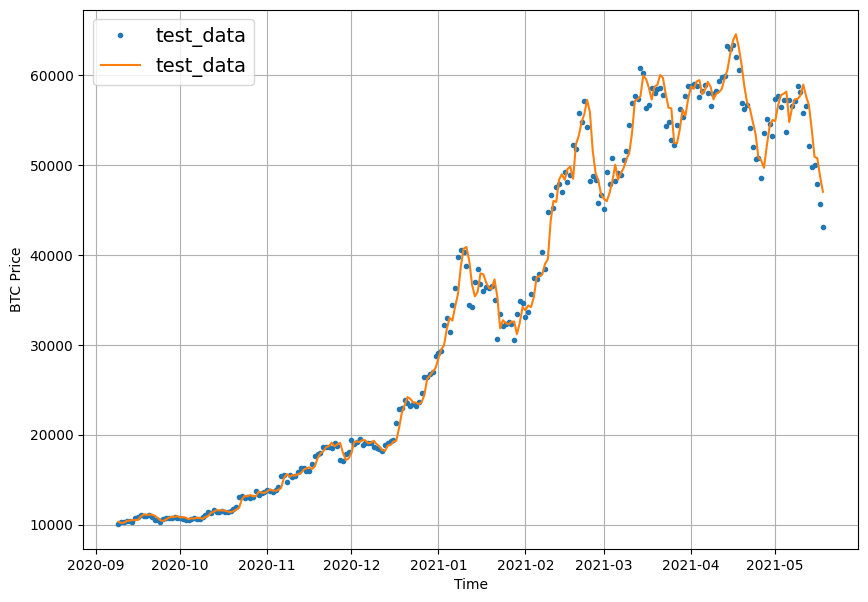

In [36]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(X_test[-len(test_windows_30_1):], test_labels_30_1[:, 0], start=offset, label='test_data')
plot_time_series(X_test[-len(test_windows_30_1):], model_2_preds, start=offset, format='-', label='test_data')

In [37]:
# Model 3 - model_1(window=30, horizon=7)
full_windows_30_7, full_labels_30_7 = make_windows(prices, window_size=30, horizon=7)
train_windows_30_7, test_windows_30_7, train_labels_30_7, test_labels_30_7 = make_train_test_splits(full_windows_30_7,
                                                                                                  full_labels_30_7)

tf.random.set_seed(42)
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(7, activation=tf.keras.activations.linear)
], name='model_3_dense_30_7')
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
               metrics=['mae','mse'])
history_3 = model_3.fit(train_windows_30_7, train_labels_30_7,
                        epochs=100,
                        batch_size=128,
                        validation_data=(test_windows_30_7, test_labels_30_7),
                        callbacks=create_model_checkpoint(model_3.name))

Epoch 1/100
 1/18 [>.............................] - ETA: 7s - loss: 4076.8120 - mae: 4076.8120 - mse: 48171016.0000INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


18/18 [==============================] - 1s 20ms/step - loss: 2001.8536 - mae: 2001.8536 - mse: 17037554.0000 - val_loss: 3787.7944 - val_mae: 3787.7944 - val_mse: 41791124.0000
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 580.4122 - mae: 580.4122 - mse: 1370784.7500INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


18/18 [==============================] - 0s 15ms/step - loss: 613.1641 - mae: 613.1641 - mse: 1629715.1250 - val_loss: 2564.9246 - val_mae: 2564.9246 - val_mse: 18348368.0000
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 433.8455 - mae: 433.8455 - mse: 659712.8125INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


18/18 [==============================] - 0s 16ms/step - loss: 478.0490 - mae: 478.0490 - mse: 1081943.6250 - val_loss: 2420.2083 - val_mae: 2420.2083 - val_mse: 16274703.0000
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 515.0391 - mae: 515.0391 - mse: 1282516.3750INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


18/18 [==============================] - 0s 13ms/step - loss: 428.1655 - mae: 428.1655 - mse: 905158.6875 - val_loss: 2243.6997 - val_mae: 2243.6997 - val_mse: 14605025.0000
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 458.1841 - mae: 458.1841 - mse: 1362969.7500INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


18/18 [==============================] - 0s 15ms/step - loss: 387.6036 - mae: 387.6036 - mse: 770732.4375 - val_loss: 2192.9292 - val_mae: 2192.9292 - val_mse: 14144156.0000
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 328.4817 - mae: 328.4817 - mse: 468253.0000INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


18/18 [==============================] - 0s 23ms/step - loss: 358.9063 - mae: 358.9063 - mse: 653839.2500 - val_loss: 1901.8289 - val_mae: 1901.8289 - val_mse: 11090885.0000
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 298.9996 - mae: 298.9996 - mse: 519119.4375INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


18/18 [==============================] - 0s 15ms/step - loss: 333.7971 - mae: 333.7971 - mse: 572905.1250 - val_loss: 1657.6660 - val_mae: 1657.6660 - val_mse: 8821865.0000
Epoch 8/100
18/18 [==============================] - 0s 3ms/step - loss: 328.6706 - mae: 328.6706 - mse: 532914.5000 - val_loss: 1691.5195 - val_mae: 1691.5195 - val_mse: 9142045.0000
Epoch 9/100
18/18 [==============================] - 0s 3ms/step - loss: 316.3736 - mae: 316.3736 - mse: 494106.1250 - val_loss: 1937.3462 - val_mae: 1937.3464 - val_mse: 10647262.0000
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 286.6089 - mae: 286.6089 - mse: 317019.1875INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


18/18 [==============================] - 0s 15ms/step - loss: 321.4010 - mae: 321.4010 - mse: 484059.0312 - val_loss: 1573.0665 - val_mae: 1573.0665 - val_mse: 7851902.0000
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 301.8864 - mae: 301.8864 - mse: 454680.8125INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


18/18 [==============================] - 0s 14ms/step - loss: 301.8490 - mae: 301.8490 - mse: 445287.6875 - val_loss: 1533.7689 - val_mae: 1533.7689 - val_mse: 7624931.0000
Epoch 12/100
18/18 [==============================] - 0s 2ms/step - loss: 291.7773 - mae: 291.7773 - mse: 426387.2188 - val_loss: 1664.8452 - val_mae: 1664.8452 - val_mse: 8537924.0000
Epoch 13/100
18/18 [==============================] - 0s 2ms/step - loss: 287.6952 - mae: 287.6952 - mse: 412377.0000 - val_loss: 1545.5966 - val_mae: 1545.5966 - val_mse: 7643728.5000
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 272.8452 - mae: 272.8452 - mse: 343745.0000INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


18/18 [==============================] - 0s 15ms/step - loss: 284.7707 - mae: 284.7707 - mse: 409491.7812 - val_loss: 1505.9547 - val_mae: 1505.9547 - val_mse: 7390735.0000
Epoch 15/100
18/18 [==============================] - 0s 2ms/step - loss: 279.7037 - mae: 279.7037 - mse: 396918.7500 - val_loss: 1664.7860 - val_mae: 1664.7860 - val_mse: 8190389.5000
Epoch 16/100
18/18 [==============================] - 0s 2ms/step - loss: 280.7230 - mae: 280.7230 - mse: 390619.5938 - val_loss: 1576.6202 - val_mae: 1576.6202 - val_mse: 7704584.5000
Epoch 17/100
18/18 [==============================] - 0s 2ms/step - loss: 278.2416 - mae: 278.2416 - mse: 386673.3438 - val_loss: 1671.9263 - val_mae: 1671.9263 - val_mse: 8320563.0000
Epoch 18/100
18/18 [==============================] - 0s 2ms/step - loss: 277.7739 - mae: 277.7739 - mse: 382493.6562 - val_loss: 1821.2915 - val_mae: 1821.2915 - val_mse: 9255431.0000
Epoch 19/100
18/18 [==============================] - 0s 2ms/step - loss: 276.6616 - ma

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


18/18 [==============================] - 0s 14ms/step - loss: 279.6984 - mae: 279.6984 - mse: 382827.0625 - val_loss: 1500.0454 - val_mae: 1500.0454 - val_mse: 7214796.0000
Epoch 21/100
18/18 [==============================] - 0s 2ms/step - loss: 264.3244 - mae: 264.3244 - mse: 356335.3750 - val_loss: 1537.2178 - val_mae: 1537.2178 - val_mse: 7357452.0000
Epoch 22/100
 1/18 [>.............................] - ETA: 0s - loss: 344.4652 - mae: 344.4652 - mse: 500674.6250INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


18/18 [==============================] - 0s 13ms/step - loss: 266.2523 - mae: 266.2523 - mse: 356083.8438 - val_loss: 1450.2142 - val_mae: 1450.2142 - val_mse: 6893274.5000
Epoch 23/100
 1/18 [>.............................] - ETA: 0s - loss: 274.4959 - mae: 274.4959 - mse: 498247.0000INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


18/18 [==============================] - 0s 14ms/step - loss: 264.3807 - mae: 264.3807 - mse: 353039.3125 - val_loss: 1425.9343 - val_mae: 1425.9343 - val_mse: 6807067.0000
Epoch 24/100
18/18 [==============================] - 0s 2ms/step - loss: 276.2861 - mae: 276.2861 - mse: 378316.9062 - val_loss: 1431.9700 - val_mae: 1431.9700 - val_mse: 6764708.5000
Epoch 25/100
18/18 [==============================] - 0s 2ms/step - loss: 265.4780 - mae: 265.4780 - mse: 349275.3438 - val_loss: 1584.6074 - val_mae: 1584.6074 - val_mse: 7571139.0000
Epoch 26/100
18/18 [==============================] - 0s 2ms/step - loss: 261.8647 - mae: 261.8647 - mse: 341708.2188 - val_loss: 1452.9932 - val_mae: 1452.9932 - val_mse: 6886377.0000
Epoch 27/100
18/18 [==============================] - 0s 2ms/step - loss: 258.6136 - mae: 258.6136 - mse: 343629.8438 - val_loss: 1440.6882 - val_mae: 1440.6882 - val_mse: 6708759.0000
Epoch 28/100
18/18 [==============================] - 0s 2ms/step - loss: 255.8605 - ma

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


18/18 [==============================] - 0s 14ms/step - loss: 252.8720 - mae: 252.8720 - mse: 325942.4375 - val_loss: 1411.6813 - val_mae: 1411.6813 - val_mse: 6645478.5000
Epoch 32/100
18/18 [==============================] - 0s 2ms/step - loss: 251.0420 - mae: 251.0420 - mse: 326581.3750 - val_loss: 1411.7008 - val_mae: 1411.7008 - val_mse: 6652974.5000
Epoch 33/100
 1/18 [>.............................] - ETA: 0s - loss: 246.7343 - mae: 246.7343 - mse: 347553.1250INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


18/18 [==============================] - 0s 14ms/step - loss: 251.6971 - mae: 251.6971 - mse: 324680.6250 - val_loss: 1400.9883 - val_mae: 1400.9883 - val_mse: 6517015.0000
Epoch 34/100
18/18 [==============================] - 0s 2ms/step - loss: 252.2048 - mae: 252.2048 - mse: 325707.8750 - val_loss: 1417.5925 - val_mae: 1417.5925 - val_mse: 6543271.0000
Epoch 35/100
 1/18 [>.............................] - ETA: 0s - loss: 221.3606 - mae: 221.3606 - mse: 219002.4844INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


18/18 [==============================] - 0s 14ms/step - loss: 249.0584 - mae: 249.0584 - mse: 318792.9688 - val_loss: 1393.0867 - val_mae: 1393.0867 - val_mse: 6463453.0000
Epoch 36/100
 1/18 [>.............................] - ETA: 0s - loss: 234.4895 - mae: 234.4895 - mse: 313123.8125INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


18/18 [==============================] - 0s 16ms/step - loss: 248.1487 - mae: 248.1487 - mse: 321486.1875 - val_loss: 1385.1877 - val_mae: 1385.1877 - val_mse: 6481980.5000
Epoch 37/100
18/18 [==============================] - 0s 3ms/step - loss: 261.1301 - mae: 261.1301 - mse: 338675.8438 - val_loss: 1407.4730 - val_mae: 1407.4730 - val_mse: 6473634.5000
Epoch 38/100
18/18 [==============================] - 0s 2ms/step - loss: 246.8889 - mae: 246.8889 - mse: 313503.7188 - val_loss: 1471.2770 - val_mae: 1471.2770 - val_mse: 6883384.5000
Epoch 39/100
18/18 [==============================] - 0s 2ms/step - loss: 249.5894 - mae: 249.5894 - mse: 312203.2500 - val_loss: 1448.1173 - val_mae: 1448.1173 - val_mse: 6703409.0000
Epoch 40/100
18/18 [==============================] - 0s 2ms/step - loss: 247.5458 - mae: 247.5458 - mse: 314653.5312 - val_loss: 1592.0370 - val_mae: 1592.0370 - val_mse: 7437118.0000
Epoch 41/100
18/18 [==============================] - 0s 2ms/step - loss: 254.6977 - ma

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


18/18 [==============================] - 0s 13ms/step - loss: 242.8732 - mae: 242.8732 - mse: 304150.1875 - val_loss: 1331.6105 - val_mae: 1331.6105 - val_mse: 6120582.5000
Epoch 44/100
18/18 [==============================] - 0s 2ms/step - loss: 247.2501 - mae: 247.2501 - mse: 311754.4688 - val_loss: 1353.2723 - val_mae: 1353.2723 - val_mse: 6176627.0000
Epoch 45/100
18/18 [==============================] - 0s 2ms/step - loss: 244.5282 - mae: 244.5282 - mse: 307194.4688 - val_loss: 1426.8529 - val_mae: 1426.8529 - val_mse: 6466804.0000
Epoch 46/100
18/18 [==============================] - 0s 2ms/step - loss: 243.9267 - mae: 243.9267 - mse: 306062.6875 - val_loss: 1341.8201 - val_mae: 1341.8201 - val_mse: 6062920.5000
Epoch 47/100
18/18 [==============================] - 0s 2ms/step - loss: 239.2423 - mae: 239.2423 - mse: 298547.9062 - val_loss: 1402.4371 - val_mae: 1402.4371 - val_mse: 6242713.5000
Epoch 48/100
 1/18 [>.............................] - ETA: 0s - loss: 264.7969 - mae: 2

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


18/18 [==============================] - 0s 14ms/step - loss: 242.2701 - mae: 242.2701 - mse: 299534.6562 - val_loss: 1326.4912 - val_mae: 1326.4912 - val_mse: 5897669.5000
Epoch 49/100
18/18 [==============================] - 0s 2ms/step - loss: 242.5078 - mae: 242.5078 - mse: 298935.5000 - val_loss: 1391.8331 - val_mae: 1391.8331 - val_mse: 6533565.5000
Epoch 50/100
18/18 [==============================] - 0s 3ms/step - loss: 241.0228 - mae: 241.0228 - mse: 298491.0625 - val_loss: 1350.3102 - val_mae: 1350.3102 - val_mse: 6046760.5000
Epoch 51/100
18/18 [==============================] - 0s 2ms/step - loss: 236.2379 - mae: 236.2379 - mse: 288952.1875 - val_loss: 1446.7681 - val_mae: 1446.7681 - val_mse: 6542497.5000
Epoch 52/100
18/18 [==============================] - 0s 2ms/step - loss: 235.5205 - mae: 235.5205 - mse: 290748.6875 - val_loss: 1367.9163 - val_mae: 1367.9163 - val_mse: 6086685.0000
Epoch 53/100
 1/18 [>.............................] - ETA: 0s - loss: 176.2851 - mae: 1

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


18/18 [==============================] - 0s 13ms/step - loss: 234.8348 - mae: 234.8348 - mse: 289171.4688 - val_loss: 1300.0957 - val_mae: 1300.0957 - val_mse: 5794640.0000
Epoch 54/100
18/18 [==============================] - 0s 2ms/step - loss: 236.5589 - mae: 236.5589 - mse: 292969.1250 - val_loss: 1303.6923 - val_mae: 1303.6923 - val_mse: 5795995.5000
Epoch 55/100
18/18 [==============================] - 0s 2ms/step - loss: 235.5728 - mae: 235.5728 - mse: 285043.1875 - val_loss: 1303.4403 - val_mae: 1303.4403 - val_mse: 5754015.0000
Epoch 56/100
18/18 [==============================] - 0s 2ms/step - loss: 237.3142 - mae: 237.3142 - mse: 291676.3438 - val_loss: 1308.2638 - val_mae: 1308.2638 - val_mse: 5790195.0000
Epoch 57/100
18/18 [==============================] - 0s 2ms/step - loss: 234.9371 - mae: 234.9371 - mse: 290020.5625 - val_loss: 1388.8284 - val_mae: 1388.8284 - val_mse: 6245534.5000
Epoch 58/100
 1/18 [>.............................] - ETA: 0s - loss: 232.3920 - mae: 2

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


18/18 [==============================] - 0s 15ms/step - loss: 236.1998 - mae: 236.1998 - mse: 288688.3438 - val_loss: 1279.5732 - val_mae: 1279.5732 - val_mse: 5635048.0000
Epoch 59/100
18/18 [==============================] - 0s 2ms/step - loss: 234.5225 - mae: 234.5225 - mse: 287316.6875 - val_loss: 1302.2059 - val_mae: 1302.2059 - val_mse: 5804451.0000
Epoch 60/100
18/18 [==============================] - 0s 2ms/step - loss: 234.6525 - mae: 234.6525 - mse: 289187.1562 - val_loss: 1298.9561 - val_mae: 1298.9561 - val_mse: 5818240.0000
Epoch 61/100
18/18 [==============================] - 0s 2ms/step - loss: 233.8161 - mae: 233.8161 - mse: 286533.5000 - val_loss: 1380.4792 - val_mae: 1380.4792 - val_mse: 6051199.5000
Epoch 62/100
18/18 [==============================] - 0s 2ms/step - loss: 236.5071 - mae: 236.5071 - mse: 288105.0625 - val_loss: 1280.2676 - val_mae: 1280.2676 - val_mse: 5760982.0000
Epoch 63/100
18/18 [==============================] - 0s 2ms/step - loss: 235.8598 - ma

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


18/18 [==============================] - 0s 14ms/step - loss: 234.0101 - mae: 234.0101 - mse: 286453.9375 - val_loss: 1267.7729 - val_mae: 1267.7729 - val_mse: 5509493.0000
Epoch 65/100
18/18 [==============================] - 0s 3ms/step - loss: 232.1611 - mae: 232.1611 - mse: 285949.1562 - val_loss: 1339.2518 - val_mae: 1339.2518 - val_mse: 5834323.5000
Epoch 66/100
18/18 [==============================] - 0s 2ms/step - loss: 234.4472 - mae: 234.4472 - mse: 287204.8125 - val_loss: 1573.4891 - val_mae: 1573.4891 - val_mse: 7197374.5000
Epoch 67/100
18/18 [==============================] - 0s 2ms/step - loss: 240.6694 - mae: 240.6694 - mse: 291635.5000 - val_loss: 1327.1913 - val_mae: 1327.1913 - val_mse: 5732394.5000
Epoch 68/100
18/18 [==============================] - 0s 2ms/step - loss: 234.9346 - mae: 234.9346 - mse: 284405.1875 - val_loss: 1272.0553 - val_mae: 1272.0553 - val_mse: 5538556.0000
Epoch 69/100
18/18 [==============================] - 0s 2ms/step - loss: 231.0772 - ma

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


18/18 [==============================] - 0s 15ms/step - loss: 227.8441 - mae: 227.8441 - mse: 275548.0000 - val_loss: 1264.7788 - val_mae: 1264.7788 - val_mse: 5526183.5000
Epoch 74/100
18/18 [==============================] - 0s 3ms/step - loss: 230.1406 - mae: 230.1406 - mse: 280463.2812 - val_loss: 1337.4138 - val_mae: 1337.4138 - val_mse: 5798990.5000
Epoch 75/100
18/18 [==============================] - 0s 2ms/step - loss: 232.3724 - mae: 232.3724 - mse: 279010.4375 - val_loss: 1463.2466 - val_mae: 1463.2466 - val_mse: 6454281.0000
Epoch 76/100
18/18 [==============================] - 0s 2ms/step - loss: 233.2733 - mae: 233.2733 - mse: 280575.5625 - val_loss: 1273.8975 - val_mae: 1273.8975 - val_mse: 5573776.5000
Epoch 77/100
18/18 [==============================] - 0s 2ms/step - loss: 232.2257 - mae: 232.2257 - mse: 280774.9375 - val_loss: 1280.3259 - val_mae: 1280.3259 - val_mse: 5543078.5000
Epoch 78/100
18/18 [==============================] - 0s 2ms/step - loss: 228.8358 - ma

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


18/18 [==============================] - 0s 15ms/step - loss: 229.8625 - mae: 229.8625 - mse: 276739.8438 - val_loss: 1256.5138 - val_mae: 1256.5138 - val_mse: 5481334.5000
Epoch 82/100
18/18 [==============================] - 0s 3ms/step - loss: 226.3204 - mae: 226.3204 - mse: 270745.0625 - val_loss: 1323.1064 - val_mae: 1323.1064 - val_mse: 5680691.0000
Epoch 83/100
18/18 [==============================] - 0s 3ms/step - loss: 227.4589 - mae: 227.4589 - mse: 273187.9062 - val_loss: 1340.7406 - val_mae: 1340.7406 - val_mse: 5850852.5000
Epoch 84/100
 1/18 [>.............................] - ETA: 0s - loss: 233.5950 - mae: 233.5950 - mse: 259621.1875INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


18/18 [==============================] - 0s 14ms/step - loss: 225.3989 - mae: 225.3989 - mse: 271383.8750 - val_loss: 1244.0188 - val_mae: 1244.0188 - val_mse: 5384207.0000
Epoch 85/100
18/18 [==============================] - 0s 3ms/step - loss: 225.0335 - mae: 225.0335 - mse: 269487.2812 - val_loss: 1279.0328 - val_mae: 1279.0328 - val_mse: 5560943.0000
Epoch 86/100
18/18 [==============================] - 0s 2ms/step - loss: 226.3824 - mae: 226.3824 - mse: 270680.4688 - val_loss: 1330.1952 - val_mae: 1330.1952 - val_mse: 5740918.5000
Epoch 87/100
18/18 [==============================] - 0s 2ms/step - loss: 232.9510 - mae: 232.9510 - mse: 277249.5000 - val_loss: 1290.5499 - val_mae: 1290.5499 - val_mse: 5554229.5000
Epoch 88/100
18/18 [==============================] - 0s 2ms/step - loss: 230.3299 - mae: 230.3299 - mse: 276761.5312 - val_loss: 1443.2432 - val_mae: 1443.2432 - val_mse: 6236720.5000
Epoch 89/100
18/18 [==============================] - 0s 2ms/step - loss: 235.4760 - ma

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3d86940>, 140026943233200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a905ae670>, 140026943233600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa0117280>, 140027209361248), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a90167e50>, 140027209361648), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


18/18 [==============================] - 0s 26ms/step - loss: 232.2358 - mae: 232.2358 - mse: 276959.9062 - val_loss: 1237.2542 - val_mae: 1237.2542 - val_mse: 5329875.5000
Epoch 92/100
18/18 [==============================] - 0s 3ms/step - loss: 225.7499 - mae: 225.7499 - mse: 268830.6562 - val_loss: 1237.5365 - val_mae: 1237.5365 - val_mse: 5449679.0000
Epoch 93/100
18/18 [==============================] - 0s 3ms/step - loss: 228.7654 - mae: 228.7654 - mse: 273405.1562 - val_loss: 1335.2006 - val_mae: 1335.2006 - val_mse: 5703348.5000
Epoch 94/100
18/18 [==============================] - 0s 3ms/step - loss: 227.6782 - mae: 227.6782 - mse: 272327.8438 - val_loss: 1323.8232 - val_mae: 1323.8232 - val_mse: 5679937.5000
Epoch 95/100
18/18 [==============================] - 0s 2ms/step - loss: 230.1256 - mae: 230.1256 - mse: 272538.7500 - val_loss: 1353.1953 - val_mae: 1353.1953 - val_mse: 5852050.5000
Epoch 96/100
18/18 [==============================] - 0s 3ms/step - loss: 233.4069 - ma

In [38]:
model_3.evaluate(test_windows_30_7, test_labels_30_7)

18/18 [==============================] - 0s 899us/step - loss: 1354.0250 - mae: 1354.0250 - mse: 5841106.0000


[1354.0250244140625, 1354.0250244140625, 5841106.0]

In [39]:
model_3 = tf.keras.models.load_model("10_model_experiments/"+model_3.name)
model_3.evaluate(test_windows_30_7, test_labels_30_7)

18/18 [==============================] - 0s 1ms/step - loss: 1237.2543 - mae: 1237.2543 - mse: 5329875.0000


[1237.2542724609375, 1237.2542724609375, 5329875.0]

In [40]:
model_3_preds = make_preds(model_3, test_windows_30_7)
model_3_results = evaluate_preds(tf.squeeze(test_labels_30_7), model_3_preds)
model_3_preds

18/18 [==============================] - 0s 651us/step


<tf.Tensor: shape=(551, 7), dtype=float32, numpy=
array([[ 9291.033,  9240.406,  9282.949, ...,  9357.465,  9307.575,
         9386.306],
       [ 8952.667,  9098.814,  8945.827, ...,  9171.843,  9137.658,
         9047.271],
       [ 8769.338,  9030.232,  8821.586, ...,  8898.667,  9188.946,
         9003.552],
       ...,
       [58209.285, 57077.082, 57652.258, ..., 59571.094, 57189.28 ,
        58498.09 ],
       [57217.793, 58689.688, 57930.48 , ..., 58065.707, 57923.684,
        58392.004],
       [57288.793, 57246.305, 57115.117, ..., 57756.016, 57384.04 ,
        58609.492]], dtype=float32)>

In [41]:
model_3_results["mae"].shape

(551,)

In [42]:
tf.reduce_mean(model_3_results["mae"]).numpy()

1237.2543

In [43]:
## modify evaluate_preds() to work with multi output - multi dimension
def evaluate_preds(y_true, y_pred):
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)
    
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)

    # multi-dimension
    if mae.ndim > 0:
        mae = tf.reduce_mean(mae)
        mse = tf.reduce_mean(mse)
        rmse = tf.reduce_mean(rmse)
        mape = tf.reduce_mean(mape)
        mase = tf.reduce_mean(mase)
    
    return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [44]:
model_3_results = evaluate_preds(test_labels_30_7, model_3_preds)
model_3_results

{'mae': 1237.2543,
 'mse': 5329875.5,
 'rmse': 1419.4443,
 'mape': 5.509648,
 'mase': 2.2016249}

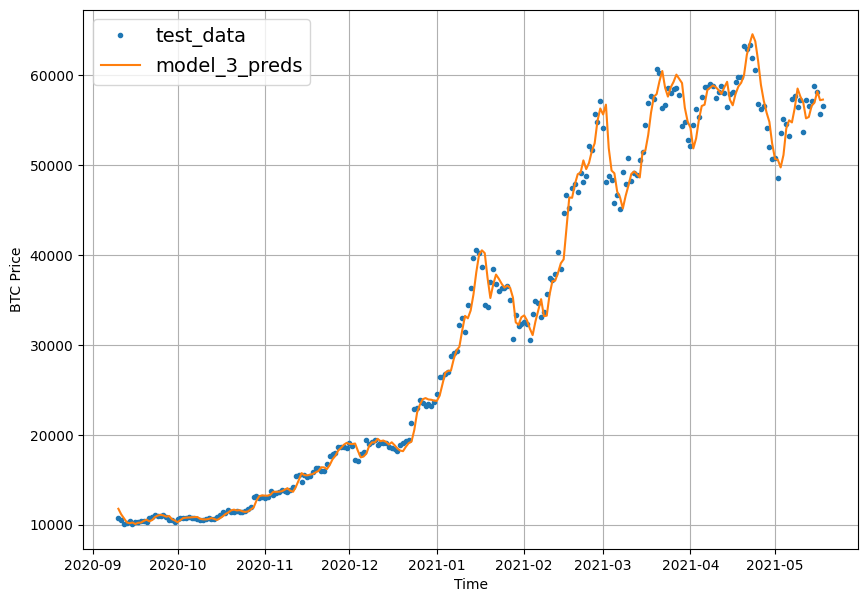

In [45]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(X_test[-len(test_windows_30_7):], test_labels_30_7[:, 0], start=offset, label='test_data')
plot_time_series(X_test[-len(test_windows_30_7):], model_3_preds[:,0], start=offset, format='-', label='model_3_preds')

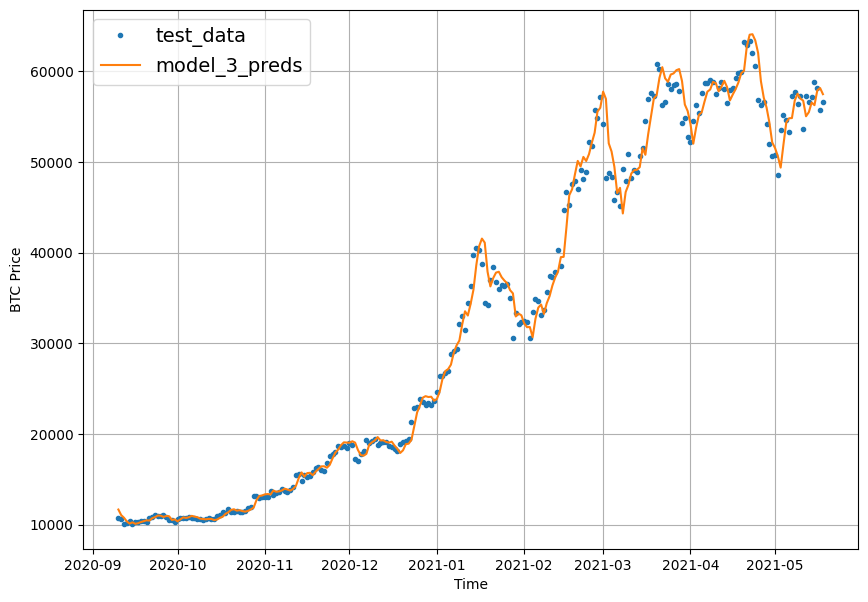

In [46]:
# or reduce it
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(X_test[-len(test_windows_30_7):], test_labels_30_7[:, 0], start=offset, label='test_data')
plot_time_series(X_test[-len(test_windows_30_7):], tf.reduce_mean(model_3_preds, axis=1), start=offset, format='-', label='model_3_preds')

<Axes: >

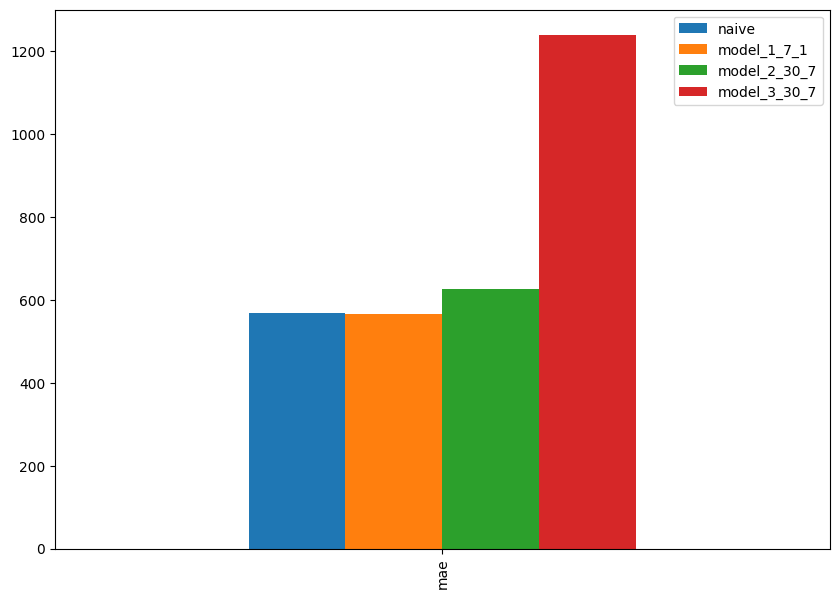

In [47]:
# Compare dense models
pd.DataFrame({"naive":model_0_results["mae"],
              "model_1_7_1":model_1_results["mae"],
              "model_2_30_7":model_2_results["mae"],
              "model_3_30_7":model_3_results["mae"]}, index=['mae']).plot(figsize=(10, 7), kind='bar')

In [48]:
# Model 4 : Conv1D - window-7, horizon-1
full_windows_7_1, full_labels_7_1 = make_windows(prices, window_size=7, horizon=1)
train_windows_7_1, test_windows_7_1, train_labels_7_1, test_labels_7_1 = make_train_test_splits(full_windows_7_1,
                                                                                                full_labels_7_1)

# we need input shape of : {batch_size, timesteps, input_dim}
tf.expand_dims(train_windows_7_1[0], axis=1).shape

TensorShape([7, 1])

In [49]:
# create expand_dims layer
expand_dims_layer = tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1))
expand_dims_layer(train_windows_7_1[0])

<tf.Tensor: shape=(7, 1), dtype=float32, numpy=
array([[123.65499],
       [125.455  ],
       [108.58483],
       [118.67466],
       [121.33866],
       [120.65533],
       [121.795  ]], dtype=float32)>

In [50]:
# conv1d
tf.random.set_seed(42)
model_4 = tf.keras.models.Sequential([
    expand_dims_layer,
    tf.keras.layers.Conv1D(filters=128, kernel_size=5, padding='causal', activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
], name='model_4_conv1d_7_1')
model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae','mse'])
history4 = model_4.fit(train_windows_7_1, train_labels_7_1,
                      epochs=100,
                     batch_size=128,
                     validation_data=(test_windows_7_1, test_labels_7_1),
                     callbacks=create_model_checkpoint(model_4.name),
                      verbose=1)

Epoch 1/100
18/18 [==============================] - ETA: 0s - loss: 1341.1202 - mae: 1341.1202 - mse: 6305188.0000  INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


18/18 [==============================] - 1s 36ms/step - loss: 1341.1202 - mae: 1341.1202 - mse: 6305188.0000 - val_loss: 2517.6094 - val_mae: 2517.6094 - val_mse: 15116300.0000
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 379.8818 - mae: 379.8818 - mse: 694091.3750INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


18/18 [==============================] - 0s 20ms/step - loss: 351.0393 - mae: 351.0393 - mse: 491764.9375 - val_loss: 1613.3671 - val_mae: 1613.3671 - val_mse: 6353491.5000
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 214.7533 - mae: 214.7533 - mse: 160326.3125INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


18/18 [==============================] - 0s 20ms/step - loss: 204.4752 - mae: 204.4752 - mse: 208903.7344 - val_loss: 1203.3555 - val_mae: 1203.3555 - val_mse: 4090547.5000
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 243.0497 - mae: 243.0497 - mse: 240401.7812INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


18/18 [==============================] - 0s 19ms/step - loss: 185.8913 - mae: 185.8913 - mse: 181247.5781 - val_loss: 1035.4906 - val_mae: 1035.4906 - val_mse: 3463597.0000
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 180.0895 - mae: 180.0895 - mse: 120893.7969INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


18/18 [==============================] - 0s 17ms/step - loss: 181.1583 - mae: 181.1583 - mse: 175613.1094 - val_loss: 1018.1512 - val_mae: 1018.1512 - val_mse: 3358368.7500
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 137.7242 - mae: 137.7242 - mse: 72136.3125INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


18/18 [==============================] - 0s 19ms/step - loss: 180.5571 - mae: 180.5571 - mse: 171225.1875 - val_loss: 1007.5734 - val_mae: 1007.5734 - val_mse: 3412931.2500
Epoch 7/100
18/18 [==============================] - 0s 3ms/step - loss: 176.5334 - mae: 176.5334 - mse: 163718.7500 - val_loss: 1008.4510 - val_mae: 1008.4510 - val_mse: 3202133.5000
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 153.8958 - mae: 153.8958 - mse: 97768.2344INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


18/18 [==============================] - 0s 20ms/step - loss: 171.9207 - mae: 171.9207 - mse: 158283.2344 - val_loss: 953.8112 - val_mae: 953.8112 - val_mse: 3032178.7500
Epoch 9/100
18/18 [==============================] - 0s 3ms/step - loss: 171.4783 - mae: 171.4783 - mse: 156991.7500 - val_loss: 993.2925 - val_mae: 993.2925 - val_mse: 3034454.0000
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 186.0797 - mae: 186.0797 - mse: 229579.9688INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


18/18 [==============================] - 0s 18ms/step - loss: 166.2750 - mae: 166.2750 - mse: 149469.1562 - val_loss: 917.0682 - val_mae: 917.0682 - val_mse: 2805720.0000
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 182.2407 - mae: 182.2407 - mse: 144222.7500INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


18/18 [==============================] - 0s 17ms/step - loss: 161.9984 - mae: 161.9984 - mse: 142465.9062 - val_loss: 900.7433 - val_mae: 900.7433 - val_mse: 2686465.2500
Epoch 12/100
18/18 [==============================] - 0s 3ms/step - loss: 158.7587 - mae: 158.7587 - mse: 137191.7500 - val_loss: 945.1464 - val_mae: 945.1464 - val_mse: 2716260.2500
Epoch 13/100
18/18 [==============================] - 0s 3ms/step - loss: 157.9211 - mae: 157.9211 - mse: 137156.7969 - val_loss: 932.7761 - val_mae: 932.7761 - val_mse: 2631233.2500
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 173.1912 - mae: 173.1912 - mse: 143103.3125INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


18/18 [==============================] - 0s 29ms/step - loss: 153.8905 - mae: 153.8905 - mse: 127943.8594 - val_loss: 876.7628 - val_mae: 876.7628 - val_mse: 2436542.7500
Epoch 15/100
18/18 [==============================] - 0s 3ms/step - loss: 152.5830 - mae: 152.5830 - mse: 127076.9766 - val_loss: 897.1230 - val_mae: 897.1230 - val_mse: 2434477.5000
Epoch 16/100
 1/18 [>.............................] - ETA: 0s - loss: 140.1906 - mae: 140.1906 - mse: 85334.1250INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


18/18 [==============================] - 0s 20ms/step - loss: 148.2664 - mae: 148.2664 - mse: 120565.2344 - val_loss: 841.7299 - val_mae: 841.7299 - val_mse: 2249450.7500
Epoch 17/100
 1/18 [>.............................] - ETA: 0s - loss: 140.9854 - mae: 140.9854 - mse: 101073.6406INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


18/18 [==============================] - 0s 17ms/step - loss: 145.0688 - mae: 145.0688 - mse: 115897.0156 - val_loss: 838.6694 - val_mae: 838.6694 - val_mse: 2199132.2500
Epoch 18/100
 1/18 [>.............................] - ETA: 0s - loss: 152.5972 - mae: 152.5972 - mse: 104855.9844INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


18/18 [==============================] - 0s 18ms/step - loss: 145.1755 - mae: 145.1755 - mse: 115796.9844 - val_loss: 815.4233 - val_mae: 815.4233 - val_mse: 2102786.2500
Epoch 19/100
 1/18 [>.............................] - ETA: 0s - loss: 83.2924 - mae: 83.2924 - mse: 36771.9375INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


18/18 [==============================] - 0s 20ms/step - loss: 138.6835 - mae: 138.6835 - mse: 107790.8203 - val_loss: 789.2828 - val_mae: 789.2828 - val_mse: 2003566.2500
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 145.0530 - mae: 145.0530 - mse: 125698.6719INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


18/18 [==============================] - 0s 18ms/step - loss: 139.6291 - mae: 139.6291 - mse: 109599.2266 - val_loss: 761.8395 - val_mae: 761.8395 - val_mse: 1963391.5000
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 181.8529 - mae: 181.8529 - mse: 150042.1250INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


18/18 [==============================] - 0s 18ms/step - loss: 139.9120 - mae: 139.9120 - mse: 109060.5312 - val_loss: 741.6682 - val_mae: 741.6682 - val_mse: 1833633.8750
Epoch 22/100
 1/18 [>.............................] - ETA: 0s - loss: 184.8122 - mae: 184.8122 - mse: 202834.8906INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


18/18 [==============================] - 0s 20ms/step - loss: 134.1603 - mae: 134.1603 - mse: 101148.5859 - val_loss: 732.1046 - val_mae: 732.1046 - val_mse: 1781616.5000
Epoch 23/100
 1/18 [>.............................] - ETA: 0s - loss: 144.6767 - mae: 144.6767 - mse: 96738.0000INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


18/18 [==============================] - 0s 19ms/step - loss: 133.0469 - mae: 133.0469 - mse: 98837.4766 - val_loss: 724.2263 - val_mae: 724.2263 - val_mse: 1736995.3750
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 146.0433 - mae: 146.0433 - mse: 93191.9922INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


18/18 [==============================] - 0s 17ms/step - loss: 131.9366 - mae: 131.9366 - mse: 97365.5938 - val_loss: 708.9746 - val_mae: 708.9746 - val_mse: 1706096.7500
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 131.4264 - mae: 131.4264 - mse: 70377.5625INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


18/18 [==============================] - 0s 19ms/step - loss: 128.4376 - mae: 128.4376 - mse: 92611.0469 - val_loss: 698.6609 - val_mae: 698.6609 - val_mse: 1660572.6250
Epoch 26/100
 1/18 [>.............................] - ETA: 0s - loss: 135.5364 - mae: 135.5364 - mse: 83748.2500INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


18/18 [==============================] - 0s 19ms/step - loss: 128.2742 - mae: 128.2742 - mse: 92199.3516 - val_loss: 689.3169 - val_mae: 689.3169 - val_mse: 1621226.3750
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 181.5884 - mae: 181.5884 - mse: 156988.4688INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


18/18 [==============================] - 0s 18ms/step - loss: 127.3551 - mae: 127.3551 - mse: 91380.5156 - val_loss: 679.1254 - val_mae: 679.1254 - val_mse: 1573438.6250
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 123.5543 - mae: 123.5543 - mse: 84084.1094INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


18/18 [==============================] - 0s 17ms/step - loss: 123.6570 - mae: 123.6570 - mse: 87553.5391 - val_loss: 671.2552 - val_mae: 671.2552 - val_mse: 1541203.2500
Epoch 29/100
18/18 [==============================] - 0s 2ms/step - loss: 122.8954 - mae: 122.8954 - mse: 86766.7344 - val_loss: 685.5124 - val_mae: 685.5124 - val_mse: 1543957.7500
Epoch 30/100
18/18 [==============================] - 0s 2ms/step - loss: 129.5666 - mae: 129.5666 - mse: 90043.1250 - val_loss: 700.7769 - val_mae: 700.7769 - val_mse: 1573012.3750
Epoch 31/100
18/18 [==============================] - 0s 3ms/step - loss: 129.6834 - mae: 129.6834 - mse: 87653.5234 - val_loss: 740.4578 - val_mae: 740.4578 - val_mse: 1667759.3750
Epoch 32/100
 1/18 [>.............................] - ETA: 0s - loss: 125.2394 - mae: 125.2394 - mse: 85878.3906INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.Unknown

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


18/18 [==============================] - 1s 31ms/step - loss: 123.8740 - mae: 123.8740 - mse: 87458.9375 - val_loss: 647.2749 - val_mae: 647.2749 - val_mse: 1446365.7500
Epoch 33/100
18/18 [==============================] - 0s 3ms/step - loss: 122.7946 - mae: 122.7946 - mse: 84798.9844 - val_loss: 648.4648 - val_mae: 648.4648 - val_mse: 1429535.2500
Epoch 34/100
 1/18 [>.............................] - ETA: 0s - loss: 132.5467 - mae: 132.5467 - mse: 125065.9688INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


18/18 [==============================] - 0s 21ms/step - loss: 120.1380 - mae: 120.1380 - mse: 83443.7734 - val_loss: 637.9438 - val_mae: 637.9438 - val_mse: 1415380.2500
Epoch 35/100
 1/18 [>.............................] - ETA: 0s - loss: 107.4958 - mae: 107.4958 - mse: 59805.4648INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


18/18 [==============================] - 0s 19ms/step - loss: 117.3355 - mae: 117.3355 - mse: 81546.2031 - val_loss: 633.0022 - val_mae: 633.0022 - val_mse: 1395158.7500
Epoch 36/100
18/18 [==============================] - 0s 3ms/step - loss: 122.3106 - mae: 122.3106 - mse: 83156.9141 - val_loss: 646.4407 - val_mae: 646.4407 - val_mse: 1405969.6250
Epoch 37/100
 1/18 [>.............................] - ETA: 0s - loss: 144.3643 - mae: 144.3643 - mse: 116830.0156INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


18/18 [==============================] - 0s 18ms/step - loss: 120.2394 - mae: 120.2394 - mse: 83171.9141 - val_loss: 631.6616 - val_mae: 631.6616 - val_mse: 1400564.7500
Epoch 38/100
 1/18 [>.............................] - ETA: 0s - loss: 110.7787 - mae: 110.7787 - mse: 71680.1641INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


18/18 [==============================] - 0s 17ms/step - loss: 117.1309 - mae: 117.1309 - mse: 80942.3984 - val_loss: 622.3141 - val_mae: 622.3141 - val_mse: 1353613.3750
Epoch 39/100
 1/18 [>.............................] - ETA: 0s - loss: 132.1938 - mae: 132.1938 - mse: 106370.2578INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


18/18 [==============================] - 0s 18ms/step - loss: 115.8255 - mae: 115.8255 - mse: 79570.5781 - val_loss: 619.0394 - val_mae: 619.0394 - val_mse: 1342142.5000
Epoch 40/100
18/18 [==============================] - 0s 2ms/step - loss: 116.0141 - mae: 116.0141 - mse: 78151.6562 - val_loss: 624.0861 - val_mae: 624.0861 - val_mse: 1368063.1250
Epoch 41/100
18/18 [==============================] - 0s 2ms/step - loss: 120.3111 - mae: 120.3111 - mse: 80663.7500 - val_loss: 703.3340 - val_mae: 703.3340 - val_mse: 1598900.7500
Epoch 42/100
 1/18 [>.............................] - ETA: 0s - loss: 121.4917 - mae: 121.4917 - mse: 66624.7969INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


18/18 [==============================] - 0s 18ms/step - loss: 122.9546 - mae: 122.9546 - mse: 83599.2578 - val_loss: 611.5137 - val_mae: 611.5137 - val_mse: 1311325.2500
Epoch 43/100
18/18 [==============================] - 0s 3ms/step - loss: 115.3953 - mae: 115.3953 - mse: 77250.9688 - val_loss: 614.7042 - val_mae: 614.7042 - val_mse: 1333450.8750
Epoch 44/100
 1/18 [>.............................] - ETA: 0s - loss: 67.6843 - mae: 67.6843 - mse: 16705.4902INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


18/18 [==============================] - 0s 17ms/step - loss: 116.0982 - mae: 116.0982 - mse: 77512.0312 - val_loss: 610.5385 - val_mae: 610.5385 - val_mse: 1301450.3750
Epoch 45/100
18/18 [==============================] - 0s 3ms/step - loss: 114.5018 - mae: 114.5018 - mse: 78348.5625 - val_loss: 649.1882 - val_mae: 649.1882 - val_mse: 1424539.1250
Epoch 46/100
18/18 [==============================] - 0s 2ms/step - loss: 119.6141 - mae: 119.6141 - mse: 78877.2422 - val_loss: 614.0750 - val_mae: 614.0750 - val_mse: 1325045.1250
Epoch 47/100
18/18 [==============================] - 0s 2ms/step - loss: 122.8630 - mae: 122.8630 - mse: 83929.0625 - val_loss: 775.7657 - val_mae: 775.7657 - val_mse: 1720193.3750
Epoch 48/100
18/18 [==============================] - 0s 2ms/step - loss: 116.1974 - mae: 116.1974 - mse: 76420.6719 - val_loss: 639.2249 - val_mae: 639.2249 - val_mse: 1352506.6250
Epoch 49/100
 1/18 [>.............................] - ETA: 0s - loss: 165.1778 - mae: 165.1778 - mse: 

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


18/18 [==============================] - 0s 17ms/step - loss: 115.9378 - mae: 115.9378 - mse: 77571.3828 - val_loss: 597.8437 - val_mae: 597.8437 - val_mse: 1266348.7500
Epoch 50/100
18/18 [==============================] - 0s 2ms/step - loss: 114.6611 - mae: 114.6611 - mse: 76230.5469 - val_loss: 603.8000 - val_mae: 603.8000 - val_mse: 1270987.8750
Epoch 51/100
18/18 [==============================] - 0s 2ms/step - loss: 112.3710 - mae: 112.3710 - mse: 75136.9609 - val_loss: 622.0795 - val_mae: 622.0795 - val_mse: 1305469.0000
Epoch 52/100
18/18 [==============================] - 0s 2ms/step - loss: 115.7986 - mae: 115.7986 - mse: 78754.4062 - val_loss: 622.5897 - val_mae: 622.5897 - val_mse: 1336833.8750
Epoch 53/100
18/18 [==============================] - 0s 2ms/step - loss: 117.4805 - mae: 117.4805 - mse: 78227.1484 - val_loss: 642.1255 - val_mae: 642.1255 - val_mse: 1347266.2500
Epoch 54/100
18/18 [==============================] - 0s 2ms/step - loss: 119.8915 - mae: 119.8915 - m

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


18/18 [==============================] - 0s 20ms/step - loss: 114.3171 - mae: 114.3171 - mse: 76514.4844 - val_loss: 588.5254 - val_mae: 588.5254 - val_mse: 1242940.6250
Epoch 56/100
18/18 [==============================] - 0s 3ms/step - loss: 110.1314 - mae: 110.1314 - mse: 73342.0703 - val_loss: 730.7081 - val_mae: 730.7081 - val_mse: 1647797.6250
Epoch 57/100
18/18 [==============================] - 0s 3ms/step - loss: 118.4516 - mae: 118.4516 - mse: 79436.8438 - val_loss: 615.2102 - val_mae: 615.2102 - val_mse: 1309708.0000
Epoch 58/100
18/18 [==============================] - 0s 2ms/step - loss: 120.6453 - mae: 120.6453 - mse: 77551.1328 - val_loss: 605.6099 - val_mae: 605.6099 - val_mse: 1260751.2500
Epoch 59/100
18/18 [==============================] - 0s 2ms/step - loss: 113.6134 - mae: 113.6134 - mse: 75339.6250 - val_loss: 596.9711 - val_mae: 596.9711 - val_mse: 1264239.6250
Epoch 60/100
 1/18 [>.............................] - ETA: 0s - loss: 94.2112 - mae: 94.2112 - mse: 39

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


18/18 [==============================] - 0s 17ms/step - loss: 110.5046 - mae: 110.5046 - mse: 73729.9141 - val_loss: 583.2097 - val_mae: 583.2097 - val_mse: 1226561.2500
Epoch 61/100
18/18 [==============================] - 0s 3ms/step - loss: 110.3406 - mae: 110.3406 - mse: 73628.3984 - val_loss: 594.8190 - val_mae: 594.8190 - val_mse: 1236125.5000
Epoch 62/100
 1/18 [>.............................] - ETA: 0s - loss: 76.9574 - mae: 76.9574 - mse: 40900.9609INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


18/18 [==============================] - 0s 17ms/step - loss: 110.7923 - mae: 110.7923 - mse: 72331.1875 - val_loss: 583.1956 - val_mae: 583.1956 - val_mse: 1229382.8750
Epoch 63/100
18/18 [==============================] - 0s 2ms/step - loss: 111.6053 - mae: 111.6053 - mse: 74061.3516 - val_loss: 601.5356 - val_mae: 601.5356 - val_mse: 1246753.6250
Epoch 64/100
18/18 [==============================] - 0s 2ms/step - loss: 110.3628 - mae: 110.3628 - mse: 72980.2578 - val_loss: 586.3661 - val_mae: 586.3661 - val_mse: 1219237.6250
Epoch 65/100
18/18 [==============================] - 0s 2ms/step - loss: 112.5555 - mae: 112.5555 - mse: 74249.2500 - val_loss: 592.7811 - val_mae: 592.7811 - val_mse: 1246712.0000
Epoch 66/100
18/18 [==============================] - 0s 3ms/step - loss: 110.7262 - mae: 110.7262 - mse: 73124.7188 - val_loss: 584.3956 - val_mae: 584.3956 - val_mse: 1213634.6250
Epoch 67/100
18/18 [==============================] - 0s 2ms/step - loss: 109.7705 - mae: 109.7705 - m

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


18/18 [==============================] - 0s 18ms/step - loss: 129.3959 - mae: 129.3959 - mse: 86020.7500 - val_loss: 577.6623 - val_mae: 577.6623 - val_mse: 1212099.2500
Epoch 71/100
18/18 [==============================] - 0s 2ms/step - loss: 112.9610 - mae: 112.9610 - mse: 73077.6172 - val_loss: 587.6824 - val_mae: 587.6824 - val_mse: 1215335.5000
Epoch 72/100
 1/18 [>.............................] - ETA: 0s - loss: 97.3938 - mae: 97.3938 - mse: 70987.0859INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


18/18 [==============================] - 0s 17ms/step - loss: 110.1647 - mae: 110.1647 - mse: 72948.8047 - val_loss: 576.8654 - val_mae: 576.8654 - val_mse: 1199014.1250
Epoch 73/100
18/18 [==============================] - 0s 3ms/step - loss: 112.3119 - mae: 112.3119 - mse: 73562.8594 - val_loss: 655.8230 - val_mae: 655.8230 - val_mse: 1389950.7500
Epoch 74/100
 1/18 [>.............................] - ETA: 0s - loss: 174.8696 - mae: 174.8696 - mse: 178094.2500INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


18/18 [==============================] - 1s 29ms/step - loss: 108.8575 - mae: 108.8575 - mse: 72151.5078 - val_loss: 576.8531 - val_mae: 576.8531 - val_mse: 1194383.5000
Epoch 75/100
18/18 [==============================] - 0s 3ms/step - loss: 109.4169 - mae: 109.4169 - mse: 71431.8984 - val_loss: 578.9059 - val_mae: 578.9059 - val_mse: 1196766.8750
Epoch 76/100
 1/18 [>.............................] - ETA: 0s - loss: 77.9790 - mae: 77.9790 - mse: 26787.4863INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


18/18 [==============================] - 0s 19ms/step - loss: 110.3830 - mae: 110.3830 - mse: 72967.1562 - val_loss: 576.1531 - val_mae: 576.1531 - val_mse: 1202830.7500
Epoch 77/100
 1/18 [>.............................] - ETA: 0s - loss: 84.7885 - mae: 84.7885 - mse: 65098.5430INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


18/18 [==============================] - 0s 17ms/step - loss: 107.9240 - mae: 107.9240 - mse: 70534.6406 - val_loss: 573.1310 - val_mae: 573.1310 - val_mse: 1192889.7500
Epoch 78/100
18/18 [==============================] - 0s 2ms/step - loss: 109.3748 - mae: 109.3748 - mse: 70734.0078 - val_loss: 580.6329 - val_mae: 580.6329 - val_mse: 1213305.8750
Epoch 79/100
18/18 [==============================] - 0s 2ms/step - loss: 108.6160 - mae: 108.6160 - mse: 72129.5938 - val_loss: 602.9075 - val_mae: 602.9075 - val_mse: 1254698.2500
Epoch 80/100
18/18 [==============================] - 0s 2ms/step - loss: 110.1926 - mae: 110.1926 - mse: 73148.8047 - val_loss: 580.8413 - val_mae: 580.8413 - val_mse: 1196364.2500
Epoch 81/100
18/18 [==============================] - 0s 3ms/step - loss: 107.3728 - mae: 107.3728 - mse: 70845.2656 - val_loss: 578.6325 - val_mae: 578.6325 - val_mse: 1191938.2500
Epoch 82/100
18/18 [==============================] - 0s 3ms/step - loss: 116.3492 - mae: 116.3492 - m

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


18/18 [==============================] - 0s 19ms/step - loss: 107.8277 - mae: 107.8277 - mse: 70170.9531 - val_loss: 567.4197 - val_mae: 567.4197 - val_mse: 1172316.2500
Epoch 90/100
18/18 [==============================] - 0s 3ms/step - loss: 107.4629 - mae: 107.4629 - mse: 68607.0938 - val_loss: 600.1804 - val_mae: 600.1804 - val_mse: 1226798.7500
Epoch 91/100
18/18 [==============================] - 0s 2ms/step - loss: 116.7167 - mae: 116.7167 - mse: 75674.2969 - val_loss: 693.9587 - val_mae: 693.9587 - val_mse: 1489810.5000
Epoch 92/100
18/18 [==============================] - 0s 2ms/step - loss: 110.6588 - mae: 110.6588 - mse: 72558.6172 - val_loss: 584.3992 - val_mae: 584.3992 - val_mse: 1212358.2500
Epoch 93/100
18/18 [==============================] - 0s 2ms/step - loss: 114.4214 - mae: 114.4214 - mse: 72963.7422 - val_loss: 595.4266 - val_mae: 595.4266 - val_mse: 1232048.2500
Epoch 94/100
18/18 [==============================] - 0s 2ms/step - loss: 111.6000 - mae: 111.6000 - m

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5aa006ea00>, 140026941281824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac41d9dc0>, 140026941282064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5ac3b2a1f0>, 140026943971856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a9018cac0>, 140026943972256), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


18/18 [==============================] - 0s 17ms/step - loss: 106.6281 - mae: 106.6281 - mse: 68708.9766 - val_loss: 565.2957 - val_mae: 565.2957 - val_mse: 1166496.5000
Epoch 96/100
18/18 [==============================] - 0s 2ms/step - loss: 110.5297 - mae: 110.5297 - mse: 70788.0156 - val_loss: 671.2575 - val_mae: 671.2575 - val_mse: 1411322.2500
Epoch 97/100
18/18 [==============================] - 0s 2ms/step - loss: 112.8326 - mae: 112.8326 - mse: 74037.7891 - val_loss: 583.6150 - val_mae: 583.6150 - val_mse: 1192326.6250
Epoch 98/100
18/18 [==============================] - 0s 2ms/step - loss: 108.0873 - mae: 108.0873 - mse: 71268.5703 - val_loss: 576.3129 - val_mae: 576.3129 - val_mse: 1191780.7500
Epoch 99/100
18/18 [==============================] - 0s 2ms/step - loss: 108.3835 - mae: 108.3835 - mse: 71250.0703 - val_loss: 567.7426 - val_mae: 567.7426 - val_mse: 1166841.6250
Epoch 100/100
18/18 [==============================] - 0s 2ms/step - loss: 114.3903 - mae: 114.3903 - 

In [51]:
model_4.evaluate(test_windows_7_1, test_labels_7_1)

18/18 [==============================] - 0s 1ms/step - loss: 618.3238 - mae: 618.3238 - mse: 1264140.5000


[618.3237915039062, 618.3237915039062, 1264140.5]

In [52]:
model_4 = tf.keras.models.load_model("10_model_experiments/"+model_4.name)
model_4.evaluate(test_windows_7_1, test_labels_7_1)

18/18 [==============================] - 0s 1ms/step - loss: 565.2957 - mae: 565.2957 - mse: 1166496.5000


[565.295654296875, 565.295654296875, 1166496.5]

In [53]:
model_4_preds = make_preds(model_4, test_windows_7_1)
model_4_results = evaluate_preds(tf.squeeze(test_labels_7_1), model_4_preds)
model_4_results

18/18 [==============================] - 0s 846us/step


{'mae': 565.2956,
 'mse': 1166496.5,
 'rmse': 1080.0447,
 'mape': 2.5338898,
 'mase': 0.9930678}

In [54]:
# Model 5 - LSTM (7_1)
inputs = tf.keras.layers.Input(shape=(7,))
x = tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
x = tf.keras.layers.LSTM(128, activation=tf.keras.activations.relu)(x)
outputs = tf.keras.layers.Dense(1)(x)
model_5 = tf.keras.Model(inputs, outputs, name='model_5_LSTM_7_1')
model_5.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())
history_5 = model_5.fit(train_windows_7_1, train_labels_7_1,
                        epochs=100,
                        batch_size=128,
                        validation_data=(test_windows_7_1, test_labels_7_1),
                        callbacks=create_model_checkpoint(model_5.name))

Epoch 1/100
 1/18 [>.............................] - ETA: 14s - loss: 3188.4722INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 2s 56ms/step - loss: 2397.1106 - val_loss: 11624.5771
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 1426.6405INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 47ms/step - loss: 1125.5717 - val_loss: 1924.3649
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 264.6934INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 62ms/step - loss: 262.6957 - val_loss: 1016.1730
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 240.9743INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 46ms/step - loss: 199.4771 - val_loss: 1015.5753
Epoch 5/100
18/18 [==============================] - 0s 3ms/step - loss: 186.9863 - val_loss: 1081.1229
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 139.9385INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 43ms/step - loss: 180.6256 - val_loss: 1012.0834
Epoch 7/100
18/18 [==============================] - 0s 3ms/step - loss: 178.9384 - val_loss: 1019.8163
Epoch 8/100
18/18 [==============================] - 0s 3ms/step - loss: 177.4547 - val_loss: 1038.4844
Epoch 9/100
18/18 [==============================] - 0s 3ms/step - loss: 175.8328 - val_loss: 1012.4311
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 191.7484INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 43ms/step - loss: 174.9470 - val_loss: 997.7353
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 193.6035INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 45ms/step - loss: 174.7422 - val_loss: 996.1871
Epoch 12/100
 1/18 [>.............................] - ETA: 0s - loss: 165.6995INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 57ms/step - loss: 173.0525 - val_loss: 994.4868
Epoch 13/100
 1/18 [>.............................] - ETA: 0s - loss: 131.4263INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 44ms/step - loss: 171.6982 - val_loss: 983.5432
Epoch 14/100
18/18 [==============================] - 0s 3ms/step - loss: 170.4183 - val_loss: 988.0203
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 173.3435INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 44ms/step - loss: 169.5300 - val_loss: 980.1704
Epoch 16/100
 1/18 [>.............................] - ETA: 0s - loss: 162.2863INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 43ms/step - loss: 168.0108 - val_loss: 938.4545
Epoch 17/100
18/18 [==============================] - 0s 3ms/step - loss: 166.2681 - val_loss: 995.5176
Epoch 18/100
18/18 [==============================] - 0s 3ms/step - loss: 166.1913 - val_loss: 972.5991
Epoch 19/100
18/18 [==============================] - 0s 3ms/step - loss: 164.0362 - val_loss: 950.8134
Epoch 20/100
18/18 [==============================] - 0s 3ms/step - loss: 170.0313 - val_loss: 1029.9746
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 230.1183INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 43ms/step - loss: 164.4043 - val_loss: 921.5062
Epoch 22/100
 1/18 [>.............................] - ETA: 0s - loss: 219.6637INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 61ms/step - loss: 161.6054 - val_loss: 910.6840
Epoch 23/100
18/18 [==============================] - 0s 3ms/step - loss: 161.0240 - val_loss: 948.6720
Epoch 24/100
18/18 [==============================] - 0s 3ms/step - loss: 158.8969 - val_loss: 924.2357
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 161.3308INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 45ms/step - loss: 157.9646 - val_loss: 887.9032
Epoch 26/100
 1/18 [>.............................] - ETA: 0s - loss: 162.3626INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 43ms/step - loss: 155.8719 - val_loss: 880.8409
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 219.9055INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 45ms/step - loss: 154.3072 - val_loss: 870.3811
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 154.6121INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 50ms/step - loss: 153.4796 - val_loss: 859.5429
Epoch 29/100
18/18 [==============================] - 0s 3ms/step - loss: 152.0015 - val_loss: 864.0275
Epoch 30/100
18/18 [==============================] - 0s 4ms/step - loss: 151.5057 - val_loss: 867.1254
Epoch 31/100
 1/18 [>.............................] - ETA: 0s - loss: 178.3653INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 67ms/step - loss: 149.0716 - val_loss: 831.7527
Epoch 32/100
 1/18 [>.............................] - ETA: 0s - loss: 127.1859INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 50ms/step - loss: 147.9940 - val_loss: 827.0272
Epoch 33/100
18/18 [==============================] - 0s 3ms/step - loss: 147.4025 - val_loss: 856.3892
Epoch 34/100
 1/18 [>.............................] - ETA: 0s - loss: 148.1203INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 47ms/step - loss: 146.3797 - val_loss: 809.2751
Epoch 35/100
18/18 [==============================] - 0s 3ms/step - loss: 144.6305 - val_loss: 816.3738
Epoch 36/100
 1/18 [>.............................] - ETA: 0s - loss: 183.8523INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 47ms/step - loss: 145.9530 - val_loss: 807.7557
Epoch 37/100
 1/18 [>.............................] - ETA: 0s - loss: 165.1503INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 48ms/step - loss: 142.5054 - val_loss: 796.6873
Epoch 38/100
 1/18 [>.............................] - ETA: 0s - loss: 141.9852INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 57ms/step - loss: 140.7730 - val_loss: 783.9141
Epoch 39/100
 1/18 [>.............................] - ETA: 0s - loss: 144.0541INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 47ms/step - loss: 139.5213 - val_loss: 782.6957
Epoch 40/100
18/18 [==============================] - 0s 3ms/step - loss: 140.4269 - val_loss: 782.6984
Epoch 41/100
 1/18 [>.............................] - ETA: 0s - loss: 140.8160INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 43ms/step - loss: 138.2531 - val_loss: 761.7578
Epoch 42/100
18/18 [==============================] - 0s 3ms/step - loss: 137.3756 - val_loss: 769.7143
Epoch 43/100
 1/18 [>.............................] - ETA: 0s - loss: 103.6015INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 44ms/step - loss: 135.6779 - val_loss: 754.3423
Epoch 44/100
 1/18 [>.............................] - ETA: 0s - loss: 76.9081INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 43ms/step - loss: 134.4428 - val_loss: 745.2063
Epoch 45/100
 1/18 [>.............................] - ETA: 0s - loss: 94.1058INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 43ms/step - loss: 133.5122 - val_loss: 739.8218
Epoch 46/100
18/18 [==============================] - 0s 3ms/step - loss: 133.6881 - val_loss: 748.0295
Epoch 47/100
 1/18 [>.............................] - ETA: 0s - loss: 126.7359INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 63ms/step - loss: 132.4174 - val_loss: 739.5119
Epoch 48/100
 1/18 [>.............................] - ETA: 0s - loss: 111.6311INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 43ms/step - loss: 132.1266 - val_loss: 729.8715
Epoch 49/100
 1/18 [>.............................] - ETA: 0s - loss: 181.3371INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 43ms/step - loss: 130.2339 - val_loss: 726.2350
Epoch 50/100
18/18 [==============================] - 0s 3ms/step - loss: 132.5340 - val_loss: 742.3007
Epoch 51/100
18/18 [==============================] - 0s 3ms/step - loss: 133.2419 - val_loss: 809.2878
Epoch 52/100
 1/18 [>.............................] - ETA: 0s - loss: 126.5510INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 46ms/step - loss: 136.0253 - val_loss: 709.6431
Epoch 53/100
 1/18 [>.............................] - ETA: 0s - loss: 81.6676INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 45ms/step - loss: 130.4611 - val_loss: 707.1068
Epoch 54/100
18/18 [==============================] - 0s 3ms/step - loss: 128.9615 - val_loss: 712.9578
Epoch 55/100
 1/18 [>.............................] - ETA: 0s - loss: 144.7264INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 57ms/step - loss: 126.4298 - val_loss: 696.3837
Epoch 56/100
 1/18 [>.............................] - ETA: 0s - loss: 126.5850INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 44ms/step - loss: 128.1448 - val_loss: 695.6477
Epoch 57/100
18/18 [==============================] - 0s 4ms/step - loss: 128.6183 - val_loss: 708.7568
Epoch 58/100
 1/18 [>.............................] - ETA: 0s - loss: 118.7954INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 44ms/step - loss: 125.1808 - val_loss: 683.7565
Epoch 59/100
 1/18 [>.............................] - ETA: 0s - loss: 89.8218INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 47ms/step - loss: 123.5636 - val_loss: 679.2746
Epoch 60/100
18/18 [==============================] - 0s 3ms/step - loss: 124.3831 - val_loss: 683.0413
Epoch 61/100
18/18 [==============================] - 0s 3ms/step - loss: 124.8783 - val_loss: 719.9709
Epoch 62/100
18/18 [==============================] - 0s 3ms/step - loss: 125.9267 - val_loss: 734.9952
Epoch 63/100
18/18 [==============================] - 0s 3ms/step - loss: 127.3246 - val_loss: 680.6138
Epoch 64/100
 1/18 [>.............................] - ETA: 0s - loss: 98.1630INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 47ms/step - loss: 121.6405 - val_loss: 679.2582
Epoch 65/100
 1/18 [>.............................] - ETA: 0s - loss: 126.6339INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 62ms/step - loss: 121.8380 - val_loss: 660.6900
Epoch 66/100
18/18 [==============================] - 0s 3ms/step - loss: 120.9984 - val_loss: 668.6703
Epoch 67/100
 1/18 [>.............................] - ETA: 0s - loss: 98.6355INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 45ms/step - loss: 122.0280 - val_loss: 655.1312
Epoch 68/100
 1/18 [>.............................] - ETA: 0s - loss: 78.9968INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 45ms/step - loss: 121.6675 - val_loss: 653.0898
Epoch 69/100
18/18 [==============================] - 0s 3ms/step - loss: 123.2757 - val_loss: 666.7866
Epoch 70/100
 1/18 [>.............................] - ETA: 0s - loss: 124.4950INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 44ms/step - loss: 120.8013 - val_loss: 648.3387
Epoch 71/100
18/18 [==============================] - 0s 3ms/step - loss: 120.6868 - val_loss: 687.4363
Epoch 72/100
18/18 [==============================] - 0s 3ms/step - loss: 125.3319 - val_loss: 670.0467
Epoch 73/100
 1/18 [>.............................] - ETA: 0s - loss: 149.1354INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 43ms/step - loss: 121.5400 - val_loss: 645.3680
Epoch 74/100
18/18 [==============================] - 0s 3ms/step - loss: 119.2201 - val_loss: 653.6243
Epoch 75/100
18/18 [==============================] - 0s 3ms/step - loss: 119.2188 - val_loss: 650.2580
Epoch 76/100
 1/18 [>.............................] - ETA: 0s - loss: 85.2961INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 55ms/step - loss: 117.8896 - val_loss: 640.3817
Epoch 77/100
18/18 [==============================] - 0s 3ms/step - loss: 120.4877 - val_loss: 668.6158
Epoch 78/100
 1/18 [>.............................] - ETA: 0s - loss: 129.5023INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 44ms/step - loss: 119.9059 - val_loss: 637.3214
Epoch 79/100
 1/18 [>.............................] - ETA: 0s - loss: 113.4966INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 46ms/step - loss: 116.8717 - val_loss: 629.9390
Epoch 80/100
18/18 [==============================] - 0s 3ms/step - loss: 117.4584 - val_loss: 655.6075
Epoch 81/100
18/18 [==============================] - 0s 3ms/step - loss: 116.8556 - val_loss: 645.8506
Epoch 82/100
18/18 [==============================] - 0s 3ms/step - loss: 118.9697 - val_loss: 631.5541
Epoch 83/100
18/18 [==============================] - 0s 3ms/step - loss: 116.6468 - val_loss: 697.3970
Epoch 84/100
18/18 [==============================] - 0s 3ms/step - loss: 120.2480 - val_loss: 658.3115
Epoch 85/100
18/18 [==============================] - 0s 3ms/step - loss: 117.7660 - val_loss: 633.3769
Epoch 86/100
 1/18 [>.............................] - ETA: 0s - loss: 114.2026INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 47ms/step - loss: 118.0710 - val_loss: 622.9246
Epoch 87/100
 1/18 [>.............................] - ETA: 0s - loss: 133.8735INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 45ms/step - loss: 115.8101 - val_loss: 618.2570
Epoch 88/100
18/18 [==============================] - 0s 3ms/step - loss: 115.5941 - val_loss: 629.6774
Epoch 89/100
18/18 [==============================] - 0s 3ms/step - loss: 114.4724 - val_loss: 646.4168
Epoch 90/100
18/18 [==============================] - 0s 3ms/step - loss: 119.6929 - val_loss: 642.3292
Epoch 91/100
18/18 [==============================] - 0s 3ms/step - loss: 116.8990 - val_loss: 661.9780
Epoch 92/100
18/18 [==============================] - 0s 4ms/step - loss: 115.5665 - val_loss: 619.5557
Epoch 93/100
 1/18 [>.............................] - ETA: 0s - loss: 116.4163INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 46ms/step - loss: 115.0519 - val_loss: 610.8276
Epoch 94/100
 1/18 [>.............................] - ETA: 0s - loss: 146.1784INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 62ms/step - loss: 113.3197 - val_loss: 609.6523
Epoch 95/100
 1/18 [>.............................] - ETA: 0s - loss: 143.2691INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 45ms/step - loss: 113.2088 - val_loss: 607.9662
Epoch 96/100
18/18 [==============================] - 0s 3ms/step - loss: 114.6767 - val_loss: 613.1803
Epoch 97/100
18/18 [==============================] - 0s 3ms/step - loss: 114.3127 - val_loss: 638.9885
Epoch 98/100
 1/18 [>.............................] - ETA: 0s - loss: 126.3777INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 45ms/step - loss: 114.9853 - val_loss: 605.2148
Epoch 99/100
 1/18 [>.............................] - ETA: 0s - loss: 155.7536INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 44ms/step - loss: 112.4301 - val_loss: 603.4845
Epoch 100/100
18/18 [==============================] - 0s 3ms/step - loss: 112.8319 - val_loss: 607.1719


In [55]:
model_5.evaluate(test_windows_7_1, test_labels_7_1)

18/18 [==============================] - 0s 1ms/step - loss: 607.1719


607.1719360351562

In [56]:
model_5 = tf.keras.models.load_model("10_model_experiments/"+model_5.name)
model_5.evaluate(test_windows_7_1, test_labels_7_1)

18/18 [==============================] - 0s 1ms/step - loss: 603.4843


603.4843139648438

In [57]:
model_5_preds = make_preds(model_5, test_windows_7_1)
model_5_results = evaluate_preds(tf.squeeze(test_labels_7_1), model_5_preds)
model_5_results

18/18 [==============================] - 0s 975us/step


{'mae': 603.4843,
 'mse': 1297168.1,
 'rmse': 1138.9329,
 'mape': 2.717444,
 'mase': 1.0601548}

### Multivariate data

In [58]:
# https://www.cmcmarkets.com/en-nz/learn-cryptocurrencies/bitcoin-halving
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [59]:
block_reward_1 = 50
block_reward_2 = 25 
block_reward_3 = 12.5 # 9th july 2016
block_reward_4 = 6.25 # 18th may 2020

block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

block_reward_2_datetime

numpy.datetime64('2012-11-28')

In [60]:
# create date ranges of where specific block_rewards should be
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days

In [61]:
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block['block_reward'] = None
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,None
2013-10-02,125.45500,None
2013-10-03,108.58483,None
2013-10-04,118.67466,None
2013-10-05,121.33866,None


In [62]:
bitcoin_prices_block.iloc[:block_reward_2_days,-1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days : block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days : , -1] = block_reward_4
bitcoin_prices_block.block_reward.value_counts()

block_reward
12.5    1409
25      1012
6.25     366
Name: count, dtype: int64

<Axes: xlabel='Date'>

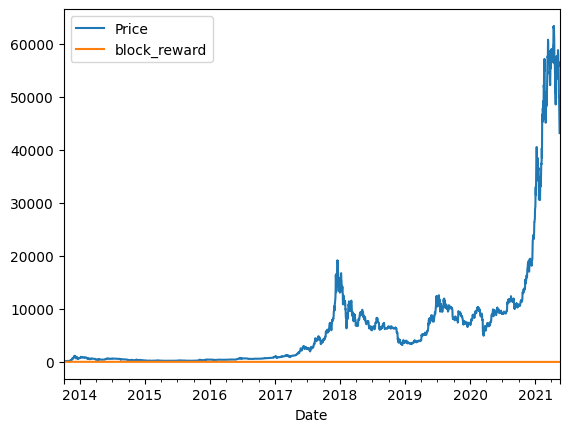

In [63]:
bitcoin_prices_block.plot()

<Axes: xlabel='Date'>

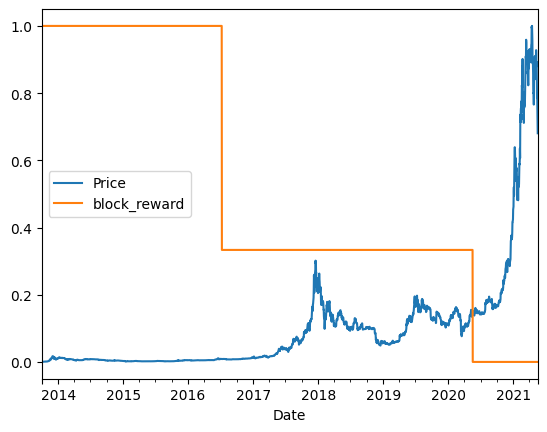

In [64]:
# normalize the data
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]),
                                     columns = bitcoin_prices_block.columns,
                                     index = bitcoin_prices_block.index)
scaled_price_block_df.plot()

In [65]:
## making a windowed dataset for multivariate data
# use pandas dataframe shift
bitcoin_prices_windowed = bitcoin_prices_block.copy()

for i in range(WINDOW_SIZE):
    bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [66]:
# Create X(windows) and y(horizon) features
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [67]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [68]:
# split the data
split_size=int(0.8*len(X))
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

In [69]:
# Model 6 - Multivariate model(model_1)
tf.random.set_seed(42)
model_6 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(HORIZON)
], name='model_6_dense_multivariate_7_1')
model_6.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())
history_6 = model_6.fit(X_train, y_train,
                        epochs=100,
                        batch_size=128,
                        validation_data=(X_test, y_test),
                        callbacks=create_model_checkpoint(model_6.name))

Epoch 1/100
 1/18 [>.............................] - ETA: 6s - loss: 5424.1836INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


18/18 [==============================] - 1s 18ms/step - loss: 3102.9192 - val_loss: 6361.7637
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 743.2902INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


18/18 [==============================] - 0s 14ms/step - loss: 450.0956 - val_loss: 1065.3124
Epoch 3/100
18/18 [==============================] - 0s 2ms/step - loss: 235.2242 - val_loss: 1086.9357
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 264.6537INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


18/18 [==============================] - 0s 14ms/step - loss: 195.8402 - val_loss: 1050.0753
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 207.8943INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


18/18 [==============================] - 0s 13ms/step - loss: 186.9288 - val_loss: 1044.6199
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 136.7972INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


18/18 [==============================] - 0s 14ms/step - loss: 182.4467 - val_loss: 1019.4912
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 222.8697INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


18/18 [==============================] - 0s 13ms/step - loss: 178.6402 - val_loss: 1000.3639
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 146.6718INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


18/18 [==============================] - 0s 13ms/step - loss: 173.5665 - val_loss: 979.5335
Epoch 9/100
 1/18 [>.............................] - ETA: 0s - loss: 143.8153INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


18/18 [==============================] - 0s 13ms/step - loss: 169.6895 - val_loss: 962.1162
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 179.3947INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


18/18 [==============================] - 0s 15ms/step - loss: 166.4830 - val_loss: 933.1088
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 177.9066INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


18/18 [==============================] - 0s 13ms/step - loss: 161.7999 - val_loss: 902.2004
Epoch 12/100
18/18 [==============================] - 0s 2ms/step - loss: 158.0775 - val_loss: 979.7054
Epoch 13/100
 1/18 [>.............................] - ETA: 0s - loss: 130.8591INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


18/18 [==============================] - 0s 13ms/step - loss: 157.1772 - val_loss: 893.8620
Epoch 14/100
18/18 [==============================] - 0s 2ms/step - loss: 152.2984 - val_loss: 927.2928
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 160.2582INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


18/18 [==============================] - 0s 12ms/step - loss: 150.7473 - val_loss: 847.1130
Epoch 16/100
 1/18 [>.............................] - ETA: 0s - loss: 135.8875INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


18/18 [==============================] - 0s 12ms/step - loss: 145.4763 - val_loss: 826.0056
Epoch 17/100
18/18 [==============================] - 0s 2ms/step - loss: 143.4212 - val_loss: 831.9585
Epoch 18/100
 1/18 [>.............................] - ETA: 0s - loss: 153.2035INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


18/18 [==============================] - 0s 13ms/step - loss: 143.8558 - val_loss: 802.1261
Epoch 19/100
18/18 [==============================] - 0s 2ms/step - loss: 138.1704 - val_loss: 806.7766
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 148.3463INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


18/18 [==============================] - 0s 14ms/step - loss: 138.6069 - val_loss: 767.4041
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 181.3008INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


18/18 [==============================] - 0s 14ms/step - loss: 139.1522 - val_loss: 756.3514
Epoch 22/100
 1/18 [>.............................] - ETA: 0s - loss: 178.9234INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


18/18 [==============================] - 0s 13ms/step - loss: 133.6182 - val_loss: 754.8043
Epoch 23/100
18/18 [==============================] - 0s 2ms/step - loss: 134.7013 - val_loss: 755.5685
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 144.0147INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


18/18 [==============================] - 0s 12ms/step - loss: 130.5803 - val_loss: 719.0568
Epoch 25/100
18/18 [==============================] - 0s 2ms/step - loss: 128.9342 - val_loss: 726.8868
Epoch 26/100
 1/18 [>.............................] - ETA: 0s - loss: 143.5997INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


18/18 [==============================] - 0s 13ms/step - loss: 131.8675 - val_loss: 712.5457
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 185.0998INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


18/18 [==============================] - 0s 13ms/step - loss: 128.4699 - val_loss: 693.3242
Epoch 28/100
18/18 [==============================] - 0s 2ms/step - loss: 124.7083 - val_loss: 703.4978
Epoch 29/100
18/18 [==============================] - 0s 2ms/step - loss: 126.6961 - val_loss: 694.0287
Epoch 30/100
 1/18 [>.............................] - ETA: 0s - loss: 142.0536INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


18/18 [==============================] - 0s 12ms/step - loss: 128.1027 - val_loss: 690.6536
Epoch 31/100
18/18 [==============================] - 0s 2ms/step - loss: 122.3756 - val_loss: 700.2916
Epoch 32/100
 1/18 [>.............................] - ETA: 0s - loss: 118.3590INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


18/18 [==============================] - 0s 12ms/step - loss: 124.9177 - val_loss: 683.0127
Epoch 33/100
18/18 [==============================] - 0s 2ms/step - loss: 121.5813 - val_loss: 706.2170
Epoch 34/100
 1/18 [>.............................] - ETA: 0s - loss: 152.2017INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


18/18 [==============================] - 0s 25ms/step - loss: 124.0803 - val_loss: 673.6058
Epoch 35/100
18/18 [==============================] - 0s 2ms/step - loss: 122.6655 - val_loss: 676.1935
Epoch 36/100
18/18 [==============================] - 0s 2ms/step - loss: 126.2307 - val_loss: 724.7150
Epoch 37/100
 1/18 [>.............................] - ETA: 0s - loss: 160.2498INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


18/18 [==============================] - 0s 12ms/step - loss: 122.7184 - val_loss: 642.2847
Epoch 38/100
 1/18 [>.............................] - ETA: 0s - loss: 112.3686INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


18/18 [==============================] - 0s 12ms/step - loss: 120.5157 - val_loss: 640.6741
Epoch 39/100
 1/18 [>.............................] - ETA: 0s - loss: 139.3756INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


18/18 [==============================] - 0s 14ms/step - loss: 118.1281 - val_loss: 635.6512
Epoch 40/100
 1/18 [>.............................] - ETA: 0s - loss: 110.7827INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


18/18 [==============================] - 0s 14ms/step - loss: 116.5681 - val_loss: 631.6619
Epoch 41/100
18/18 [==============================] - 0s 2ms/step - loss: 117.7670 - val_loss: 658.0252
Epoch 42/100
 1/18 [>.............................] - ETA: 0s - loss: 117.6800INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


18/18 [==============================] - 0s 12ms/step - loss: 124.8958 - val_loss: 626.3932
Epoch 43/100
 1/18 [>.............................] - ETA: 0s - loss: 91.6360INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


18/18 [==============================] - 0s 12ms/step - loss: 115.1344 - val_loss: 624.8879
Epoch 44/100
 1/18 [>.............................] - ETA: 0s - loss: 65.5063INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


18/18 [==============================] - 0s 12ms/step - loss: 114.7490 - val_loss: 619.2574
Epoch 45/100
18/18 [==============================] - 0s 2ms/step - loss: 113.6650 - val_loss: 633.3314
Epoch 46/100
18/18 [==============================] - 0s 2ms/step - loss: 115.3541 - val_loss: 654.9654
Epoch 47/100
18/18 [==============================] - 0s 2ms/step - loss: 117.6876 - val_loss: 760.9156
Epoch 48/100
 1/18 [>.............................] - ETA: 0s - loss: 129.5086INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


18/18 [==============================] - 0s 14ms/step - loss: 115.0569 - val_loss: 614.9716
Epoch 49/100
 1/18 [>.............................] - ETA: 0s - loss: 155.9188INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


18/18 [==============================] - 0s 13ms/step - loss: 113.3204 - val_loss: 610.5024
Epoch 50/100
 1/18 [>.............................] - ETA: 0s - loss: 135.0161INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


18/18 [==============================] - 0s 12ms/step - loss: 114.9676 - val_loss: 608.1767
Epoch 51/100
 1/18 [>.............................] - ETA: 0s - loss: 90.1237INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


18/18 [==============================] - 0s 12ms/step - loss: 114.1067 - val_loss: 603.1450
Epoch 52/100
 1/18 [>.............................] - ETA: 0s - loss: 127.8128INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


18/18 [==============================] - 0s 12ms/step - loss: 113.0477 - val_loss: 600.2379
Epoch 53/100
18/18 [==============================] - 0s 2ms/step - loss: 113.7663 - val_loss: 658.2164
Epoch 54/100
 1/18 [>.............................] - ETA: 0s - loss: 110.7485INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


18/18 [==============================] - 0s 13ms/step - loss: 114.1326 - val_loss: 597.2050
Epoch 55/100
18/18 [==============================] - 0s 2ms/step - loss: 115.3827 - val_loss: 599.2513
Epoch 56/100
18/18 [==============================] - 0s 2ms/step - loss: 111.3950 - val_loss: 754.3749
Epoch 57/100
18/18 [==============================] - 0s 2ms/step - loss: 125.0078 - val_loss: 660.6318
Epoch 58/100
18/18 [==============================] - 0s 2ms/step - loss: 119.9068 - val_loss: 648.3901
Epoch 59/100
 1/18 [>.............................] - ETA: 0s - loss: 103.8370INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


18/18 [==============================] - 0s 13ms/step - loss: 118.7560 - val_loss: 591.8207
Epoch 60/100
18/18 [==============================] - 0s 2ms/step - loss: 113.3917 - val_loss: 640.0911
Epoch 61/100
 1/18 [>.............................] - ETA: 0s - loss: 142.3640INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


18/18 [==============================] - 0s 13ms/step - loss: 113.8953 - val_loss: 591.4085
Epoch 62/100
18/18 [==============================] - 0s 2ms/step - loss: 109.7750 - val_loss: 596.6061
Epoch 63/100
18/18 [==============================] - 0s 2ms/step - loss: 113.5500 - val_loss: 635.9698
Epoch 64/100
18/18 [==============================] - 0s 2ms/step - loss: 111.6092 - val_loss: 655.4680
Epoch 65/100
18/18 [==============================] - 0s 2ms/step - loss: 113.6295 - val_loss: 602.0848
Epoch 66/100
 1/18 [>.............................] - ETA: 0s - loss: 118.0643INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


18/18 [==============================] - 0s 12ms/step - loss: 109.7626 - val_loss: 584.9959
Epoch 67/100
18/18 [==============================] - 0s 2ms/step - loss: 107.5695 - val_loss: 620.9002
Epoch 68/100
18/18 [==============================] - 0s 2ms/step - loss: 113.3508 - val_loss: 664.8947
Epoch 69/100
18/18 [==============================] - 0s 2ms/step - loss: 133.3203 - val_loss: 706.6177
Epoch 70/100
18/18 [==============================] - 0s 2ms/step - loss: 129.2840 - val_loss: 585.0390
Epoch 71/100
18/18 [==============================] - 0s 2ms/step - loss: 114.9707 - val_loss: 619.6193
Epoch 72/100
 1/18 [>.............................] - ETA: 0s - loss: 108.3701INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


18/18 [==============================] - 0s 13ms/step - loss: 109.1340 - val_loss: 581.2463
Epoch 73/100
18/18 [==============================] - 0s 2ms/step - loss: 110.9959 - val_loss: 586.2314
Epoch 74/100
 1/18 [>.............................] - ETA: 0s - loss: 165.6953INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


18/18 [==============================] - 0s 13ms/step - loss: 112.4094 - val_loss: 579.6152
Epoch 75/100
18/18 [==============================] - 0s 2ms/step - loss: 109.1664 - val_loss: 589.6285
Epoch 76/100
18/18 [==============================] - 0s 2ms/step - loss: 108.7334 - val_loss: 580.0216
Epoch 77/100
 1/18 [>.............................] - ETA: 0s - loss: 83.8919INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


18/18 [==============================] - 0s 12ms/step - loss: 108.2345 - val_loss: 578.5666
Epoch 78/100
18/18 [==============================] - 0s 2ms/step - loss: 107.9022 - val_loss: 580.1289
Epoch 79/100
18/18 [==============================] - 0s 2ms/step - loss: 108.1068 - val_loss: 584.5322
Epoch 80/100
18/18 [==============================] - 0s 2ms/step - loss: 108.8351 - val_loss: 642.5869
Epoch 81/100
18/18 [==============================] - 0s 2ms/step - loss: 109.4377 - val_loss: 585.6237
Epoch 82/100
18/18 [==============================] - 0s 2ms/step - loss: 119.9657 - val_loss: 637.9719
Epoch 83/100
18/18 [==============================] - 0s 2ms/step - loss: 111.2377 - val_loss: 639.4448
Epoch 84/100
 1/18 [>.............................] - ETA: 0s - loss: 118.1837INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 1

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


18/18 [==============================] - 0s 12ms/step - loss: 110.6189 - val_loss: 575.2239
Epoch 85/100
18/18 [==============================] - 0s 2ms/step - loss: 106.8874 - val_loss: 584.0999
Epoch 86/100
18/18 [==============================] - 0s 2ms/step - loss: 110.0873 - val_loss: 596.9724
Epoch 87/100
18/18 [==============================] - 0s 2ms/step - loss: 106.7954 - val_loss: 607.7565
Epoch 88/100
18/18 [==============================] - 0s 2ms/step - loss: 108.1644 - val_loss: 576.3683
Epoch 89/100
 1/18 [>.............................] - ETA: 0s - loss: 104.0523INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


18/18 [==============================] - 0s 13ms/step - loss: 108.5706 - val_loss: 573.0013
Epoch 90/100
18/18 [==============================] - 0s 2ms/step - loss: 106.3491 - val_loss: 585.7635
Epoch 91/100
18/18 [==============================] - 0s 2ms/step - loss: 110.1938 - val_loss: 597.0785
Epoch 92/100
18/18 [==============================] - 0s 2ms/step - loss: 111.3698 - val_loss: 573.5316
Epoch 93/100
18/18 [==============================] - 0s 2ms/step - loss: 116.0844 - val_loss: 598.4412
Epoch 94/100
18/18 [==============================] - 0s 2ms/step - loss: 113.8523 - val_loss: 582.0881
Epoch 95/100
18/18 [==============================] - 0s 2ms/step - loss: 105.9279 - val_loss: 575.0188
Epoch 96/100
18/18 [==============================] - 0s 2ms/step - loss: 108.1667 - val_loss: 612.9982
Epoch 97/100
18/18 [==============================] - 0s 2ms/step - loss: 108.9480 - val_loss: 576.5323
Epoch 98/100
 1/18 [>.............................] - ETA: 0s - loss: 114.67

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


18/18 [==============================] - 0s 12ms/step - loss: 107.6052 - val_loss: 570.7070
Epoch 99/100
 1/18 [>.............................] - ETA: 0s - loss: 151.8804INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5b18c91ac0>, 140026940373312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047a7cd0>, 140026940373712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a240f18b0>, 140027808363504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a1c31ae50>, 140027808363904), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


18/18 [==============================] - 0s 12ms/step - loss: 108.5926 - val_loss: 569.9415
Epoch 100/100
18/18 [==============================] - 0s 2ms/step - loss: 110.6400 - val_loss: 603.0744


In [70]:
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 898us/step - loss: 603.0745


603.0745239257812

In [71]:
model_6 = tf.keras.models.load_model("10_model_experiments/"+model_6.name)
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 862us/step - loss: 569.9414


569.94140625

In [72]:
model_6_preds = model_6.predict(X_test)
model_6_results = evaluate_preds(y_test, tf.squeeze(model_6_preds))
model_6_results

18/18 [==============================] - 0s 762us/step


{'mae': 569.9414,
 'mse': 1172258.8,
 'rmse': 1082.709,
 'mape': 2.542867,
 'mase': 1.0012292}

In [73]:
model_0_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [74]:
# Model 7 - NBEATS model - works on univariate time series data only

#create n-beats block input

class NBeatsBlock(tf.keras.layers.Layer):
    def __init__(self, input_size, theta_size, horizon, n_neurons, n_layers, **kwargs):
        super().__init__(**kwargs)
        self.input_size=input_size
        self.theta_size=theta_size
        self.horizon=horizon
        self.n_neurons=n_neurons
        self.n_layers = n_layers

        #block contains stack of 4 fully connected layers each has relu activation
        self.hidden = [tf.keras.layers.Dense(self.n_neurons, activation=tf.keras.activations.relu) for _ in range(n_layers)]
        
        #output of block is a theta layer with linear activation
        self.theta_layer = tf.keras.layers.Dense(self.theta_size, activation=tf.keras.activations.linear, name='theta')

    def call(self, inputs):
        x = inputs
        for layer in self.hidden:
            x = layer(x)
        theta = self.theta_layer(x)
        # output the backcast and the forecast from theta
        backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
        return backcast, forecast

tf.random.set_seed(42)
# test the n-beats block class
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON,
                                       horizon=HORIZON,
                                       n_neurons=512,
                                       n_layers=4)
# create dummy inputs
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE)+1, axis=0)

# pass dummy inputs to nbeats block layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# these are the activation outputs of the theta layer (they'll be random due to no training of the model)
tf.squeeze(backcast.numpy()), tf.squeeze(forecast.numpy())

(<tf.Tensor: shape=(7,), dtype=float32, numpy=
 array([-0.51900554,  0.31173635, -0.02271706, -0.00269225, -0.10986315,
        -0.15188584,  0.12693444], dtype=float32)>,
 <tf.Tensor: shape=(), dtype=float32, numpy=-0.00091180205>)

In [75]:
# Prepare the data with tf.data
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
    bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(i+1)
# bitcoin_prices_nbeats.head()
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

split_size=int(0.8*len(X))
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size: ], y[split_size:]

train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)
test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset)).batch(1024).prefetch(tf.data.AUTOTUNE)
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset)).batch(1024).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

In [76]:
## Setting up hyper parameters for N-BEATS algorithm
N_EPOCHS=5000
BATCH_SIZE=1024
N_NEURONS=512
N_STACKS=30
N_LAYERS=4

INPUT_SIZE= WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

In [77]:
# Residual connections - (subtract and add residuals)
tensor_1 = tf.range(10)+10
tensor_2 = tf.range(10)
tf.keras.layers.subtract([tensor_1, tensor_2]), tf.keras.layers.add([tensor_1, tensor_2])

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28], dtype=int32)>)

## Building, compiling and fitting nbeats

In [78]:
%%time
tf.random.set_seed(42)

# setup an instance of NBeatsBlock
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                theta_size=THETA_SIZE,
                                horizon=HORIZON,
                                n_neurons = N_NEURONS,
                                n_layers=N_LAYERS,
                                name='InitialBlock')

# Create Input to stack
stack_input = tf.keras.layers.Input(shape=(INPUT_SIZE), name='stack_input')

# create inital backcast and forecast input
residuals, forecast = nbeats_block_layer(stack_input)

# use for loop to create stacks of block layer
for i, _ in enumerate(range(N_STACKS-1)):
    backcast, block_forecast = NBeatsBlock(input_size=INPUT_SIZE,
                                     theta_size=THETA_SIZE,
                                     horizon=HORIZON,
                                     n_neurons=N_NEURONS,
                                     n_layers=N_LAYERS,
                                     name=f'NBeatsBlock_{i}')(residuals)
    residuals = tf.keras.layers.subtract([residuals, backcast], name=f'subtract_{i}')
    forecast = tf.keras.layers.add([forecast, block_forecast], name=f'add_{i}')

# put the stack model together
model_7 = tf.keras.Model(inputs=stack_input, outputs=forecast, name='model_7_NBEATS_7_1')

model_7.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

#callbacks and fit
history_7 = model_7.fit(train_dataset,
                        epochs=N_EPOCHS,
                        verbose=0,
                        validation_data=test_dataset,
                        callbacks=[tf.keras.callbacks.EarlyStopping(patience=200, restore_best_weights=True),
                                   tf.keras.callbacks.ReduceLROnPlateau(patience=100, verbose=1)])


Epoch 898: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 998: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
CPU times: user 3min, sys: 14.4 s, total: 3min 15s
Wall time: 3min 45s


In [79]:
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 18ms/step - loss: 573.6453


573.645263671875

In [80]:
model_7_preds = make_preds(model_7, test_dataset)
model_7_results = evaluate_preds(y_test, model_7_preds)
model_7_results

1/1 [==============================] - 1s 719ms/step


{'mae': 573.64526,
 'mse': 1190358.2,
 'rmse': 1091.0354,
 'mape': 2.5950284,
 'mase': 1.0077358}

In [81]:
model_0_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

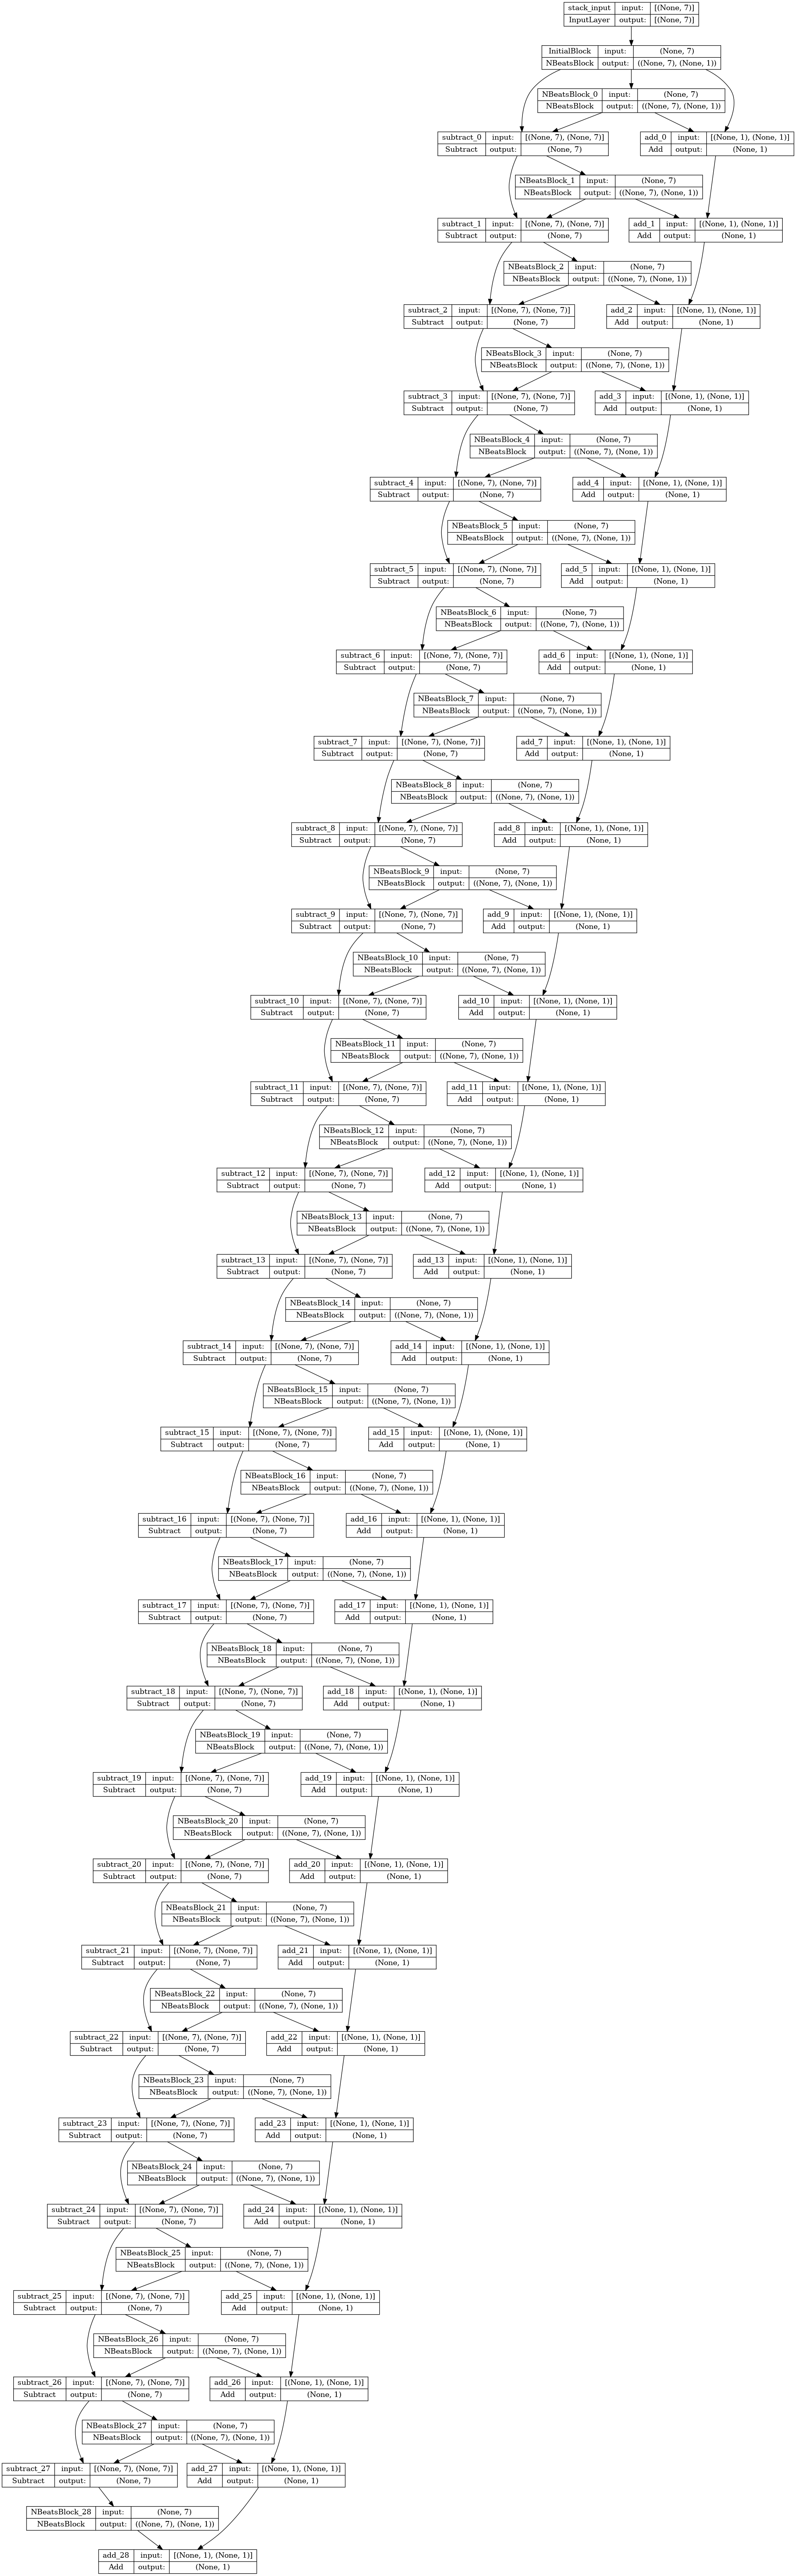

In [82]:
# plot 
from tensorflow.keras.utils import plot_model
plot_model(model_7, show_shapes=True)

### Model 8 - Ensemble

In [83]:
def get_ensemble_models(horizon=HORIZON, train_data=train_dataset, test_data=test_dataset, num_iter=10,
                        num_epochs=1000, loss_fns=['mae','mse','mape']):
    ensemble_models=[]
    for i in range(num_iter):
        for loss_function in loss_fns:
            print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model_number:{i}")
            model = tf.keras.models.Sequential([
                tf.keras.layers.Dense(128, activation=tf.keras.activations.relu, kernel_initializer='he_normal'),
                tf.keras.layers.Dense(128, activation=tf.keras.activations.relu, kernel_initializer='he_normal'),
                tf.keras.layers.Dense(HORIZON, activation=tf.keras.activations.linear)
            ])
            model.compile(loss=loss_function,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae','mse'])
            model.fit(train_data,
                      epochs=num_epochs,
                      validation_data=test_data,
                      verbose=0,
                      callbacks=[tf.keras.callbacks.EarlyStopping(patience=200, restore_best_weights=True),
                                 tf.keras.callbacks.ReduceLROnPlateau(patience=100, verbose=1)])
            ensemble_models.append(model)
    return ensemble_models

In [84]:
%%time
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model_number:0

Epoch 930: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mse for 1000 epochs, model_number:0

Epoch 349: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 449: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model_number:0

Epoch 308: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 408: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mae for 1000 epochs, model_number:1

Epoch 462: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mse for 1000 epochs, model_number:1

Epoch 902: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mape for 1000 epochs, model_number:1

Epoch 227: ReduceLROnPlateau reducing lea

In [85]:
len(ensemble_models), ensemble_models

(15,
  <keras.src.engine.sequential.Sequential at 0x7f5a04c62340>])

In [86]:
# make predictions with ensemble_models
def make_ensemble_preds(emsemble_models, data):
    ensemble_preds=[]
    for model in ensemble_models:
        preds=model.predict(data)
        ensemble_preds.append(preds)
    return tf.constant(tf.squeeze(ensemble_preds))
ensemble_preds = make_ensemble_preds(ensemble_models, test_dataset)
ensemble_preds

1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 23ms/step


<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8783.057 ,  8754.847 ,  9047.539 , ..., 50008.258 , 48636.902 ,
        46191.76  ],
       [ 8741.549 ,  8761.846 ,  9066.406 , ..., 50757.27  , 48337.71  ,
        45996.773 ],
       [ 8801.629 ,  8773.259 ,  9052.727 , ..., 49387.66  , 48399.94  ,
        45434.434 ],
       ...,
       [ 8828.711 ,  8764.677 ,  9076.469 , ..., 50027.734 , 48690.36  ,
        46584.86  ],
       [ 8782.1875,  8743.108 ,  9056.568 , ..., 49892.34  , 48820.062 ,
        46737.027 ],
       [ 8853.114 ,  8843.91  ,  9088.759 , ..., 50531.086 , 48608.023 ,
        46062.426 ]], dtype=float32)>

In [87]:
model_8_results = evaluate_preds(y_test, ensemble_preds)
model_8_results

{'mae': 578.064,
 'mse': 1169624.5,
 'rmse': 1081.4551,
 'mape': 2.6238887,
 'mase': 1.0154984}

In [88]:
ensemble_mean = tf.reduce_mean(ensemble_preds, axis=0)
ensemble_mean

<tf.Tensor: shape=(556,), dtype=float32, numpy=
array([ 8794.382 ,  8779.408 ,  9064.286 ,  8719.592 ,  8731.677 ,
        8740.653 ,  8649.179 ,  8482.542 ,  8458.075 ,  8519.292 ,
        8205.419 ,  8103.556 ,  8065.1035,  7634.5693,  7274.5317,
        7318.8184,  7087.508 ,  7209.96  ,  7140.898 ,  7512.2646,
        7398.692 ,  7743.053 ,  7567.9688,  7395.6978,  7319.8643,
        7310.8794,  7203.883 ,  7378.751 ,  7510.266 ,  7540.2563,
        7552.6455,  7332.578 ,  7225.81  ,  7186.3096,  7182.848 ,
        7223.6875,  7079.9272,  7094.2534,  6877.988 ,  6587.0317,
        7380.1353,  7172.0063,  7132.256 ,  7290.7295,  7280.3843,
        7177.6978,  7221.384 ,  7207.15  ,  7171.1846,  7212.524 ,
        7306.286 ,  7388.1274,  7246.939 ,  7166.32  ,  7161.331 ,
        6951.4907,  7266.2905,  7340.4663,  7354.2163,  7729.103 ,
        8087.383 ,  8146.417 ,  7853.2954,  8090.966 ,  8106.444 ,
        8162.28  ,  8109.615 ,  8754.547 ,  8908.774 ,  8768.58  ,
        8946.4

In [89]:
ensemble_median = np.median(ensemble_preds, axis=0)
ensemble_median

array([ 8785.987 ,  8769.057 ,  9066.406 ,  8715.161 ,  8728.707 ,
        8740.558 ,  8651.508 ,  8485.409 ,  8458.668 ,  8516.945 ,
        8208.588 ,  8093.294 ,  8071.5405,  7638.161 ,  7270.5327,
        7317.4546,  7090.0356,  7202.5376,  7143.9316,  7515.569 ,
        7402.19  ,  7738.4404,  7573.9937,  7404.1187,  7315.3184,
        7313.2856,  7209.9106,  7380.051 ,  7512.667 ,  7541.4717,
        7554.358 ,  7332.119 ,  7230.318 ,  7182.845 ,  7182.391 ,
        7226.4233,  7083.483 ,  7093.4136,  6871.9575,  6582.7026,
        7374.288 ,  7175.367 ,  7138.357 ,  7302.3843,  7267.589 ,
        7181.194 ,  7218.6323,  7203.1196,  7173.6636,  7211.9507,
        7303.7935,  7384.713 ,  7247.581 ,  7168.851 ,  7157.266 ,
        6953.2383,  7264.065 ,  7342.0347,  7362.173 ,  7732.412 ,
        8087.1025,  8134.024 ,  7848.0776,  8095.4414,  8109.0317,
        8169.0464,  8117.196 ,  8753.737 ,  8898.744 ,  8774.006 ,
        8951.921 ,  8972.566 ,  8664.804 ,  8625.795 ,  8691.7

In [90]:
model_8_results_mean = evaluate_preds(y_test, ensemble_mean)
model_8_results_median = evaluate_preds(y_test, ensemble_median)
pd.DataFrame({"model_8_results":model_8_results,
              "model_8_results_mean":model_8_results_mean,
              "model_8_results_median":model_8_results_median}).T

,mae,mse,rmse,mape,mase
model_8_results,578.064026,1169624.50,1081.455078,2.623889,1.015498
model_8_results_mean,568.984009,1144445.50,1069.787598,2.567614,0.999547
model_8_results_median,568.982239,1140448.75,1067.917969,2.560675,0.999544


#### Plotting prediction intervals (uncertainity estimates) of ensemble

In [91]:
# FInd upper and lower bound of ensemble predicions
def get_upper_lower(preds):
    std = tf.math.reduce_std(preds, axis=0)
    interval = std*1.96
    preds_mean = tf.reduce_mean(preds, axis=0)
    lower, upper = preds_mean-interval, preds_mean+interval
    return lower, upper

lower, upper = get_upper_lower(ensemble_preds)
lower[:5], upper[:5]

(<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8734.799, 8720.548, 9020.353, 8653.626, 8681.66 ], dtype=float32)>,
 <tf.Tensor: shape=(5,), dtype=float32, numpy=array([8853.965, 8838.269, 9108.22 , 8785.558, 8781.693], dtype=float32)>)

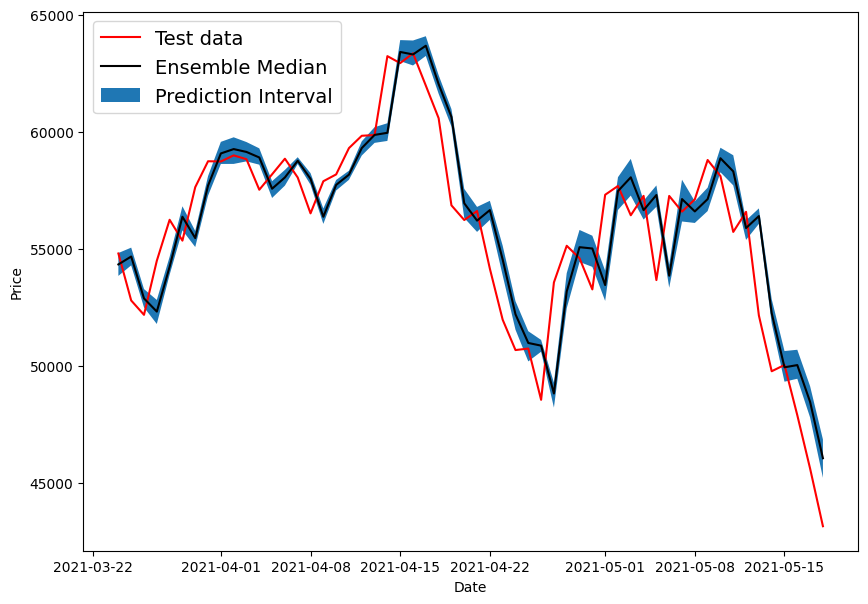

In [92]:
ensemble_median = np.median(ensemble_preds, axis=0)

#plot interval predictions
offset=500
plt.figure(figsize=(10,7))
plt.plot(X_test.index[offset:], y_test[offset:], "r", label="Test data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], 'k-', label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("Price")
plt.fill_between(X_test.index[offset:],
                lower[offset:],
                upper[offset:], label='Prediction Interval')
plt.legend(loc='upper left', fontsize=14)

#### Model 9 - Future prediction model

In [93]:
X_all = bitcoin_prices_windowed.dropna().drop(["Price","block_reward"], axis=1).to_numpy()
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()

features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all)).batch(1024).prefetch(tf.data.AUTOTUNE)

tf.random.set_seed(42)
model_9 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(128, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
], name='model_9_dense_7_1')

model_9.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

history_9 = model_9.fit(dataset_all,
                        epochs=100,
                        verbose=0)

In [94]:
# make prediction
INTO_FUTURE = 14

def make_future_forecasts(values, model, into_future, window_size=WINDOW_SIZE):
    future_forecast=[]
    last_window = values[-window_size:]
    for _ in range(into_future):
        future_pred = model.predict(tf.expand_dims(last_window, axis=0))
        print(f"Predicting on : {last_window} -> Prediciton : {tf.squeeze(future_pred).numpy()}\n")
        future_forecast.append(tf.squeeze(future_pred).numpy())
        last_window = np.append(last_window, future_pred)[-window_size:]
    return future_forecast

future_forecast = make_future_forecasts(y_all, model_9, 14, 7)

1/1 [==============================] - 0s 40ms/step
Predicting on : [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediciton : 55655.734375

1/1 [==============================] - 0s 14ms/step
Predicting on : [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 55655.734375  ] -> Prediciton : 50684.24609375

1/1 [==============================] - 0s 14ms/step
Predicting on : [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 55655.734375   50684.24609375] -> Prediciton : 48547.1015625

1/1 [==============================] - 0s 14ms/step
Predicting on : [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 55655.734375   50684.24609375 48547.1015625 ] -> Prediciton : 49029.53125

1/1 [==============================] - 0s 14ms/step
Predicting on : [47885.62525472 45604.61575361 43144.47129086 55655.734375
 50684.24609375 48547.1015625  49029.53125   ] 

In [95]:
future_forecast

[55655.734,
 50684.246,
 48547.1,
 49029.53,
 46741.344,
 44941.945,
 48729.023,
 53800.44,
 49002.28,
 47999.453,
 48148.67,
 46070.277,
 46824.17,
 51111.195]

In [96]:
def get_future_dates(start_date, into_future, offset=1):
    start_date = start_date + np.timedelta64(offset, "D")
    end_date = start_date + np.timedelta64(into_future, "D")
    return np.arange(start_date, end_date, dtype='datetime64[D]')

last_timestep = bitcoin_prices.index[-1]
next_timesteps = get_future_dates(start_date = last_timestep,
                                  into_future=INTO_FUTURE)
next_timesteps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

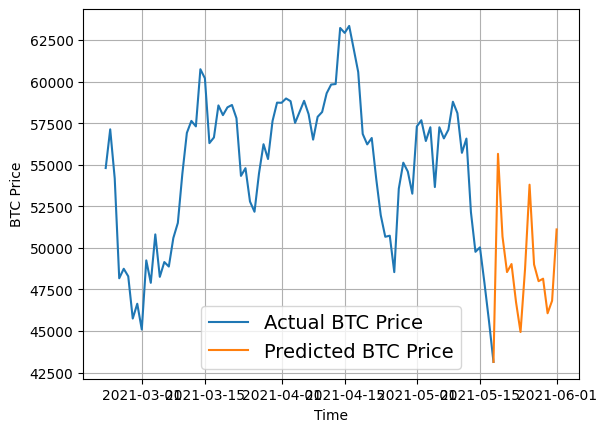

In [97]:
next_timesteps = np.insert(next_timesteps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, prices[-1])
plt.figure()
plot_time_series(bitcoin_prices.index, prices, start=2700, format='-', label='Actual BTC Price')
plot_time_series(next_timesteps, future_forecast, format='-', label='Predicted BTC Price')

### Turkey model

In [98]:
# let us introduce turkey problem into our data
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1]/100
btc_price_turkey[-10:]

[58788.2096789273,
 58102.1914262342,
 55715.5466512869,
 56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 431.44471290860304]

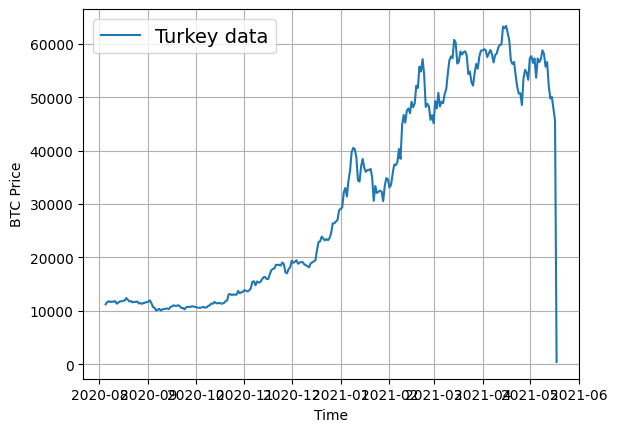

In [99]:
btc_timesteps_turkey = np.array(bitcoin_prices.index)
plot_time_series(btc_timesteps_turkey, btc_price_turkey, format='-', label='Turkey data', start=2500)

In [100]:
# create train_test sets
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size=7, horizon=1)
X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)
model_10 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
], name='model_10_7_1')
model_10.compile(loss='mae',
                 optimizer=tf.keras.optimizers.Adam())
history_10 = model_10.fit(X_train, y_train,
                          epochs=100,
                         verbose=0,
                         batch_size=128,
                         validation_data=(X_test, y_test),
                         callbacks=create_model_checkpoint(model_10.name))

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04866a90>, 140023231630352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04888f40>, 140023231630272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a047fd160>, 140023214389168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f5a04860be0>, 140023214389088), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


In [101]:
model_10.evaluate(X_test, y_test)

18/18 [==============================] - 0s 970us/step - loss: 763.0535


763.053466796875

In [102]:
model_10 = tf.keras.models.load_model("10_model_experiments/"+model_10.name)
model_10.evaluate(X_test, y_test)

18/18 [==============================] - 0s 1ms/step - loss: 647.4953


647.4953002929688

In [103]:
model_10_preds = make_preds(model_10, X_test)
model_10_results = evaluate_preds(y_test, model_10_preds)
model_10_results

18/18 [==============================] - 0s 843us/step


{'mae': 17120.225,
 'mse': 613751600.0,
 'rmse': 23696.223,
 'mape': 121.23584,
 'mase': 26.493603}

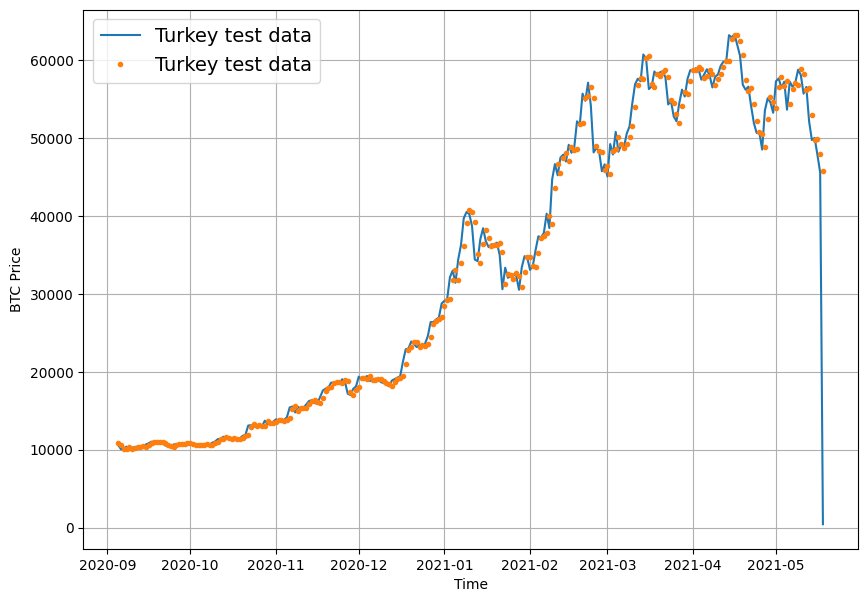

In [104]:
plt.figure(figsize=(10,7))
plot_time_series(btc_timesteps_turkey[-len(X_test):], btc_price_turkey[-len(y_test):], format='-', label='Turkey test data', start=300)
plot_time_series(btc_timesteps_turkey[-len(X_test):], model_10_preds, label='Turkey test data', start=300)

## Compare all models

In [105]:
model_results = pd.DataFrame({"naive":model_0_results,
              "model_1_7_1":model_1_results,
              "model_2_30_7":model_2_results,
              "model_3_30_7":model_3_results,
              "model_4_COnv1d":model_4_results,
              "model_5_LSTM":model_5_results,
              "model_6_multivariate":model_6_results,
              "model_7_NBEATS":model_7_results,
              "model_8_ensemble":model_8_results,
              "model_10_turkey":model_10_results}).T
model_results

,mae,mse,rmse,mape,mase
naive,567.980225,1.147547e+06,1071.236206,2.516525,0.999570
model_1_7_1,565.913513,1.158107e+06,1076.153809,2.552211,0.994153
model_2_30_7,626.316284,1.305902e+06,1142.760742,2.857001,1.094807
model_3_30_7,1237.254272,5.329876e+06,1419.444336,5.509648,2.201625
model_4_COnv1d,565.295593,1.166496e+06,1080.044678,2.533890,0.993068
model_5_LSTM,603.484314,1.297168e+06,1138.932861,2.717444,1.060155
model_6_multivariate,569.941406,1.172259e+06,1082.708984,2.542867,1.001229
model_7_NBEATS,573.645264,1.190358e+06,1091.035400,2.595028,1.007736
model_8_ensemble,578.064026,1.169624e+06,1081.455078,2.623889,1.015498
model_10_turkey,17120.224609,6.137516e+08,23696.222656,121.235840,26.493603


<Axes: >

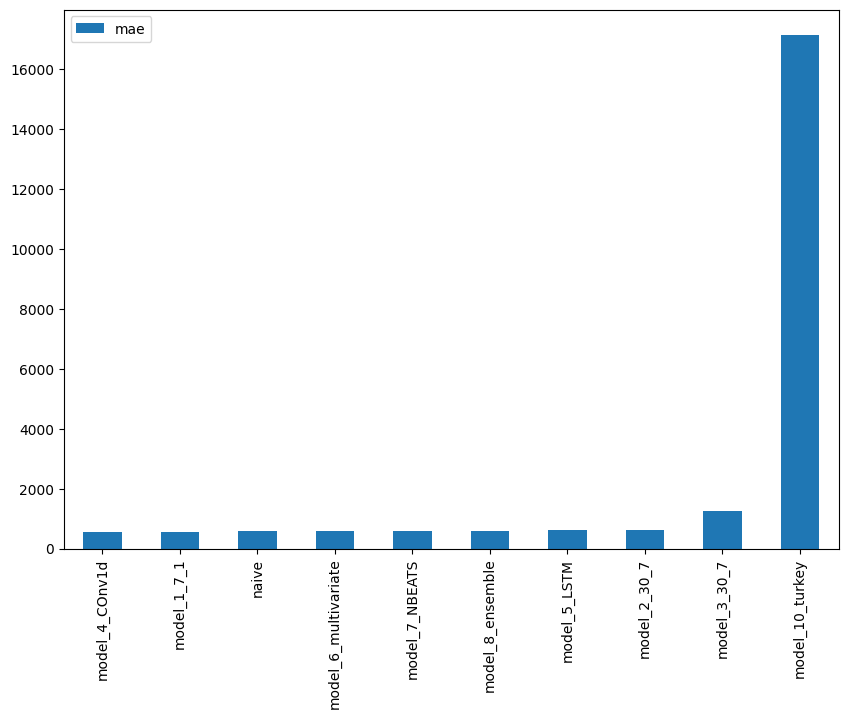

In [106]:
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10,7), kind='bar')

# EXERCISE

In [118]:
#1. Does scaling the data help for univariate/multivariate data? (e.g. getting all of the values between 0 & 1)
# scale the prices
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
prices_norm = tf.squeeze(scaler.fit_transform(prices.reshape(-1,1))).numpy()
full_windows_norm, full_labels_norm = make_windows(prices_norm)
train_windows_norm, test_windows_norm, train_labels_norm, test_labels_norm = make_train_test_splits(full_windows_norm, full_labels_norm)
model_1_norm = tf.keras.models.clone_model(model_1)
model_1_norm._name="model_1_norm"
model_1_norm.compile(loss='mae',
                     optimizer=tf.keras.optimizers.Adam())
history_1_norm = model_1_norm.fit(train_windows_norm, train_labels_norm,
                                  epochs=100,
                                  batch_size=128,
                                  validation_data=(test_windows_norm, test_labels_norm),
                                  callbacks=create_model_checkpoint(model_1_norm.name))

Epoch 1/100
 1/18 [>.............................] - ETA: 6s - loss: 0.0548INFO:tensorflow:Assets written to: 10_model_experiments/model_1_norm/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_norm/assets


18/18 [==============================] - 1s 18ms/step - loss: 0.0201 - val_loss: 0.0193
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 0.0082INFO:tensorflow:Assets written to: 10_model_experiments/model_1_norm/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_norm/assets


18/18 [==============================] - 0s 13ms/step - loss: 0.0051 - val_loss: 0.0133
Epoch 3/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.0150
Epoch 4/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0170
Epoch 5/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 0.0154
Epoch 6/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0158
Epoch 7/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0166
Epoch 8/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0137
Epoch 9/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 0.0150
Epoch 10/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0154
Epoch 11/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0023 - val_loss: 0.0153
Epoch 12/100
18/18 

INFO:tensorflow:Assets written to: 10_model_experiments/model_1_norm/assets


18/18 [==============================] - 0s 13ms/step - loss: 0.0021 - val_loss: 0.0132
Epoch 14/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0153
Epoch 15/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.0155
Epoch 16/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0136
Epoch 17/100
 1/18 [>.............................] - ETA: 0s - loss: 0.0017INFO:tensorflow:Assets written to: 10_model_experiments/model_1_norm/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_norm/assets


18/18 [==============================] - 0s 14ms/step - loss: 0.0020 - val_loss: 0.0130
Epoch 18/100
 1/18 [>.............................] - ETA: 0s - loss: 0.0021INFO:tensorflow:Assets written to: 10_model_experiments/model_1_norm/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_norm/assets


18/18 [==============================] - 0s 13ms/step - loss: 0.0020 - val_loss: 0.0125
Epoch 19/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0165
Epoch 20/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0127
Epoch 21/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0132
Epoch 22/100
 1/18 [>.............................] - ETA: 0s - loss: 0.0028INFO:tensorflow:Assets written to: 10_model_experiments/model_1_norm/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_norm/assets


18/18 [==============================] - 0s 14ms/step - loss: 0.0020 - val_loss: 0.0118
Epoch 23/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0137
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 0.0022INFO:tensorflow:Assets written to: 10_model_experiments/model_1_norm/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_norm/assets


18/18 [==============================] - 0s 12ms/step - loss: 0.0020 - val_loss: 0.0117
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 0.0023INFO:tensorflow:Assets written to: 10_model_experiments/model_1_norm/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_norm/assets


18/18 [==============================] - 0s 13ms/step - loss: 0.0022 - val_loss: 0.0113
Epoch 26/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0022 - val_loss: 0.0118
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 0.0026INFO:tensorflow:Assets written to: 10_model_experiments/model_1_norm/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_norm/assets


18/18 [==============================] - 0s 12ms/step - loss: 0.0020 - val_loss: 0.0109
Epoch 28/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0121
Epoch 29/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0131
Epoch 30/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0137
Epoch 31/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0169
Epoch 32/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0122
Epoch 33/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0122
Epoch 34/100
 1/18 [>.............................] - ETA: 0s - loss: 0.0023INFO:tensorflow:Assets written to: 10_model_experiments/model_1_norm/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_norm/assets


18/18 [==============================] - 0s 12ms/step - loss: 0.0020 - val_loss: 0.0108
Epoch 35/100
 1/18 [>.............................] - ETA: 0s - loss: 0.0027INFO:tensorflow:Assets written to: 10_model_experiments/model_1_norm/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_norm/assets


18/18 [==============================] - 0s 13ms/step - loss: 0.0021 - val_loss: 0.0105
Epoch 36/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0105
Epoch 37/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0108
Epoch 38/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0110
Epoch 39/100
 1/18 [>.............................] - ETA: 0s - loss: 0.0022INFO:tensorflow:Assets written to: 10_model_experiments/model_1_norm/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_norm/assets


18/18 [==============================] - 0s 13ms/step - loss: 0.0019 - val_loss: 0.0100
Epoch 40/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0107
Epoch 41/100
 1/18 [>.............................] - ETA: 0s - loss: 0.0017INFO:tensorflow:Assets written to: 10_model_experiments/model_1_norm/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_norm/assets


18/18 [==============================] - 0s 12ms/step - loss: 0.0019 - val_loss: 0.0099
Epoch 42/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0107
Epoch 43/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0104
Epoch 44/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0110
Epoch 45/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0101
Epoch 46/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0119
Epoch 47/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0126
Epoch 48/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0121
Epoch 49/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0115
Epoch 50/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0108
Epoch 51/100

INFO:tensorflow:Assets written to: 10_model_experiments/model_1_norm/assets


18/18 [==============================] - 0s 12ms/step - loss: 0.0020 - val_loss: 0.0099
Epoch 58/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0110
Epoch 59/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0104
Epoch 60/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0018 - val_loss: 0.0118
Epoch 61/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0114
Epoch 62/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0104
Epoch 63/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0111
Epoch 64/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0127
Epoch 65/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0107
Epoch 66/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0129
Epoch 67/100

In [122]:
model_1_norm.evaluate(test_windows_norm, test_labels_norm)

18/18 [==============================] - 0s 823us/step - loss: 0.0117


0.011688298545777798

In [129]:
model_1_norm = tf.keras.models.load_model("10_model_experiments/"+model_1_norm.name)
model_1_norm.evaluate(test_windows_norm, test_labels_norm)
model_1_norm_preds = make_preds(model_1_norm, test_windows)
model_1_norm_results = evaluate_preds(tf.squeeze(test_labels), model_1_norm_preds)
model_1_norm_results, model_1_results

18/18 [==============================] - 0s 667us/step


({'mae': 790.0344,
  'mse': 1766856.8,
  'rmse': 1329.2316,
  'mape': 3.715164,
  'mase': 1.3878716},
 {'mae': 565.9135,
  'mse': 1158106.9,
  'rmse': 1076.1538,
  'mape': 2.5522108,
  'mase': 0.9941533})

In [141]:
#model_6 -norm data
scaled_price_block = scaled_price_block_df.copy() 
for i in range(WINDOW_SIZE):
    scaled_price_block[f"Price+{i+1}"] = scaled_price_block["Price"].shift(i+1)
X = scaled_price_block.dropna().drop('Price', axis=1).to_numpy()
y = scaled_price_block.dropna()["Price"].to_numpy()
split_size=int(0.8*len(X))
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size: ], y[split_size:]

train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)
test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset)).batch(1024).prefetch(tf.data.AUTOTUNE)
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset)).batch(1024).prefetch(tf.data.AUTOTUNE)

model_6_norm = tf.keras.models.clone_model(model_6)
model_6_norm._name='model_6_norm'
model_6_norm.compile(loss='mae',
                     optimizer=tf.keras.optimizers.Adam())
history_6_norm = model_6_norm.fit(train_dataset,
                                  epochs=100,
                                  validation_data=test_dataset,
                                  callbacks=create_model_checkpoint(model_6_norm.name))
model_6_norm = tf.keras.models.load_model("10_model_experiments/"+model_6_norm.name)
model_6_norm.evaluate(X_test, y_test)
model_6_norm_preds = model_6_norm.predict(X_test)
model_6_norm_results = evaluate_preds(y_test, tf.squeeze(model_6_norm_preds))
model_6_norm_results

Epoch 1/100
1/3 [=========>....................] - ETA: 0s - loss: 0.1012INFO:tensorflow:Assets written to: 10_model_experiments/model_6_norm/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_norm/assets


3/3 [==============================] - 1s 121ms/step - loss: 0.0964 - val_loss: 0.1936
Epoch 2/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0442INFO:tensorflow:Assets written to: 10_model_experiments/model_6_norm/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_norm/assets


3/3 [==============================] - 0s 96ms/step - loss: 0.0469 - val_loss: 0.1245
Epoch 3/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0082INFO:tensorflow:Assets written to: 10_model_experiments/model_6_norm/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_norm/assets


3/3 [==============================] - 0s 89ms/step - loss: 0.0181 - val_loss: 0.0690
Epoch 4/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0319INFO:tensorflow:Assets written to: 10_model_experiments/model_6_norm/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_norm/assets


3/3 [==============================] - 0s 91ms/step - loss: 0.0264 - val_loss: 0.0463
Epoch 5/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0358INFO:tensorflow:Assets written to: 10_model_experiments/model_6_norm/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_norm/assets


3/3 [==============================] - 0s 94ms/step - loss: 0.0308 - val_loss: 0.0401
Epoch 6/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0222INFO:tensorflow:Assets written to: 10_model_experiments/model_6_norm/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_norm/assets


3/3 [==============================] - 0s 95ms/step - loss: 0.0209 - val_loss: 0.0395
Epoch 7/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0083 - val_loss: 0.0417
Epoch 8/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0146INFO:tensorflow:Assets written to: 10_model_experiments/model_6_norm/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_norm/assets


3/3 [==============================] - 0s 92ms/step - loss: 0.0123 - val_loss: 0.0357
Epoch 9/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0123INFO:tensorflow:Assets written to: 10_model_experiments/model_6_norm/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_norm/assets


3/3 [==============================] - 0s 95ms/step - loss: 0.0117 - val_loss: 0.0318
Epoch 10/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0096 - val_loss: 0.0320
Epoch 11/100
3/3 [==============================] - 0s 5ms/step - loss: 0.0098 - val_loss: 0.0350
Epoch 12/100
3/3 [==============================] - 0s 5ms/step - loss: 0.0065 - val_loss: 0.0382
Epoch 13/100
3/3 [==============================] - 0s 6ms/step - loss: 0.0068 - val_loss: 0.0334
Epoch 14/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0073INFO:tensorflow:Assets written to: 10_model_experiments/model_6_norm/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_norm/assets


3/3 [==============================] - 0s 93ms/step - loss: 0.0091 - val_loss: 0.0310
Epoch 15/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0046INFO:tensorflow:Assets written to: 10_model_experiments/model_6_norm/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_norm/assets


3/3 [==============================] - 0s 93ms/step - loss: 0.0070 - val_loss: 0.0304
Epoch 16/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0077INFO:tensorflow:Assets written to: 10_model_experiments/model_6_norm/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_norm/assets


3/3 [==============================] - 0s 100ms/step - loss: 0.0080 - val_loss: 0.0278
Epoch 17/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0073INFO:tensorflow:Assets written to: 10_model_experiments/model_6_norm/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_norm/assets


3/3 [==============================] - 1s 293ms/step - loss: 0.0078 - val_loss: 0.0273
Epoch 18/100
3/3 [==============================] - 0s 6ms/step - loss: 0.0054 - val_loss: 0.0288
Epoch 19/100
3/3 [==============================] - 0s 5ms/step - loss: 0.0055 - val_loss: 0.0326
Epoch 20/100
3/3 [==============================] - 0s 5ms/step - loss: 0.0068 - val_loss: 0.0305
Epoch 21/100
3/3 [==============================] - 0s 6ms/step - loss: 0.0049 - val_loss: 0.0293
Epoch 22/100
3/3 [==============================] - 0s 6ms/step - loss: 0.0044 - val_loss: 0.0305
Epoch 23/100
3/3 [==============================] - 0s 6ms/step - loss: 0.0055 - val_loss: 0.0316
Epoch 24/100
3/3 [==============================] - 0s 6ms/step - loss: 0.0047 - val_loss: 0.0324
Epoch 25/100
3/3 [==============================] - 0s 5ms/step - loss: 0.0048 - val_loss: 0.0311
Epoch 26/100
3/3 [==============================] - 0s 5ms/step - loss: 0.0053 - val_loss: 0.0322
Epoch 27/100
3/3 [=============

INFO:tensorflow:Assets written to: 10_model_experiments/model_6_norm/assets


3/3 [==============================] - 0s 103ms/step - loss: 0.0030 - val_loss: 0.0272
Epoch 94/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0041 - val_loss: 0.0287
Epoch 95/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0018INFO:tensorflow:Assets written to: 10_model_experiments/model_6_norm/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_norm/assets


3/3 [==============================] - 0s 102ms/step - loss: 0.0031 - val_loss: 0.0267
Epoch 96/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0042 - val_loss: 0.0287
Epoch 97/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0018INFO:tensorflow:Assets written to: 10_model_experiments/model_6_norm/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_norm/assets


3/3 [==============================] - 0s 102ms/step - loss: 0.0031 - val_loss: 0.0267
Epoch 98/100
3/3 [==============================] - 0s 5ms/step - loss: 0.0042 - val_loss: 0.0286
Epoch 99/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0017INFO:tensorflow:Assets written to: 10_model_experiments/model_6_norm/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_norm/assets


3/3 [==============================] - 0s 98ms/step - loss: 0.0031 - val_loss: 0.0266
Epoch 100/100
18/18 [==============================] - 0s 679us/step


{'mae': 0.026643163,
 'mse': 0.002320423,
 'rmse': 0.048170768,
 'mape': 5.910848,
 'mase': 2.959842}

In [142]:
model_6_results

{'mae': 569.9414,
 'mse': 1172258.8,
 'rmse': 1082.709,
 'mape': 2.542867,
 'mase': 1.0012292}

Therefore normalizing the data doesnt improve the model, it worsen's it

In [175]:
# 2 For future predictions, try to make a prediction, retrain a model on the predictions, make a prediction, retrain a model, make a prediction, retrain a model, make a prediction (retrain a model each time a new prediction is made). Plot the results, how do they look compared to the future predictions where a model wasn't retrained for every forecast (model_9)?
def make_future_forecasts(train_data, values, model, into_future, window_size=WINDOW_SIZE):
    future_forecast=[]
    last_window = values[-window_size:]
    for _ in range(into_future):
        future_pred = model.predict(tf.expand_dims(last_window, axis=0))
        print(f"Predicting on : {last_window} -> Prediciton : {tf.squeeze(future_pred).numpy()}\n")
        future_forecast.append(tf.squeeze(future_pred).numpy())
        last_window = np.append(last_window, future_pred)[-window_size:]

        train_data = np.append(train_data, [last_window], axis=0)
        features_dataset_all = tf.data.Dataset.from_tensor_slices(train_data)
        labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)
        dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all)).batch(1024).prefetch(tf.data.AUTOTUNE)
        model.fit(dataset_all, epochs=100, verbose=0)
        
    return future_forecast

future_forecast = make_future_forecasts(X_all, y_all, model_9, 14, 7)

1/1 [==============================] - 0s 18ms/step
Predicting on : [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediciton : 57148.5234375

1/1 [==============================] - 0s 13ms/step
Predicting on : [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 57148.5234375 ] -> Prediciton : 51567.2890625

1/1 [==============================] - 0s 12ms/step
Predicting on : [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 57148.5234375  51567.2890625 ] -> Prediciton : 49997.51171875

1/1 [==============================] - 0s 11ms/step
Predicting on : [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 57148.5234375  51567.2890625  49997.51171875] -> Prediciton : 49653.51171875

1/1 [==============================] - 0s 14ms/step
Predicting on : [47885.62525472 45604.61575361 43144.47129086 57148.5234375
 51567.2890625  49997.51171875 49653.51171

In [176]:
last_timestep = bitcoin_prices.index[-1]
next_timesteps = get_future_dates(start_date = last_timestep,
                                  into_future=INTO_FUTURE)
next_timesteps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

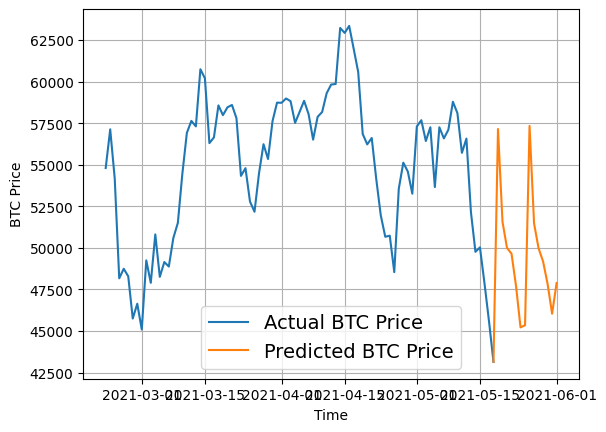

In [178]:
next_timesteps = np.insert(next_timesteps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, prices[-1])
plt.figure()
plot_time_series(bitcoin_prices.index, prices, start=2700, format='-', label='Actual BTC Price')
plot_time_series(next_timesteps, future_forecast, format='-', label='Predicted BTC Price')